In [32]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [33]:
SUBGRAPH_API_URL = "https://api.thegraph.com/subgraphs/name/papercliplabs/compound-v3"

sg = Subgrounds()

comp_v3 = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

/var/folders/q3/3f7l37mx6xxgf9mq9l_t26f00000gn/T/ipykernel_96425/4232131412.py:3: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2604:3d08:1184:6900:d03b:e94f:d2be:b334', 65463, 0, 0), raddr=('2606:4700:4400::ac40:93e1', 443, 0, 0)>
  sg = Subgrounds()


2023-10-09


In [34]:
# Protocol Current

protocols = comp_v3.Query.protocols()

overview_df = sg.query_df([protocols])
print("Overview")
display(overview_df.T)

markets_df = sg.query_df([protocols.markets])
print("Market Proxy Addresses")
display(markets_df)

accounting_df = sg.query_df([protocols.accounting])
print("Accounting")
display(accounting_df.T)

usage_df = sg.query_df([protocols.cumulativeUsage])
print("Usage")
display(usage_df.T)

Overview


0
protocols_id                          0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorProxy           0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_configuratorImplementation  0xcfc1fa6b7ca982176529899d99af6473ad80df4f
protocols_accounting_id               0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_id            0x50524f544f434f4c5f43554d554c4154495645

Market Proxy Addresses


protocols_markets_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                 protocols_markets_cometProxy  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                protocols_markets_protocol_id  \
0  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   
1  0x316f9708bb98af7da9c68c1c3b5e79039cd336e3   

   protocols_markets_creationBlockNumber  \
0                               16477039   
1                               15331596   

           protocols_markets_configuration_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

              protocols_markets_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1  0xc3d688b66703497daa19211eedff47f25384cdc3   

                protocols_markets_cumulativeUsage_id  
0  0x4d41524b45545f43554d554c4154495645a17581a9e3...  
1  0x4d41524b45545f43554d554c4154495645c3d688b667...

Accounting


0
protocols_accounting_id                            0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_protocol_id                   0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_accounting_lastUpdatedBlock                                                18315072
protocols_accounting_totalSupplyUsd                                          411290362.935437
protocols_accounting_totalBorrowUsd                                          353633470.772255
protocols_accounting_reserveBalanceUsd                                         4221349.855725
protocols_accounting_collateralBalanceUsd                                    670009063.841049
protocols_accounting_collateralReservesBalanceUsd                                   70.469595
protocols_accounting_totalReserveBalanceUsd                                    4221420.325319
protocols_accounting_utilization                                                     0.859815
protocols_accounting_collateralization                                               1.163041
protocols_accounting_avgSupplyApr                                                    0.024739
protocols_accounting_avgBorrowApr                                                    0.037297
protocols_accounting_avgRewardSupplyApr                                              0.014018
protocols_accounting_avgRewardBorrowApr                                              0.009323
protocols_accounting_avgNetSupplyApr                                                 0.038757
protocols_accounting_avgNetBorrowApr                                                 0.027974

Usage


0
protocols_cumulativeUsage_id                         0x50524f544f434f4c5f43554d554c4154495645
protocols_cumulativeUsage_protocol_id              0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
protocols_cumulativeUsage_uniqueUsersCount                                               7579
protocols_cumulativeUsage_transactionCount                                              39175
protocols_cumulativeUsage_supplyBaseCount                                                9453
protocols_cumulativeUsage_withdrawBaseCount                                             11062
protocols_cumulativeUsage_liquidationCount                                                181
protocols_cumulativeUsage_supplyCollateralCount                                         13161
protocols_cumulativeUsage_withdrawCollateralCount                                        5276
protocols_cumulativeUsage_transferCollateralCount                                          42

In [45]:
# Market Current

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]
    print(market_name)

    market = comp_v3.Query.market(id=market_id)

    overview_df = sg.query_df([market])
    print(f"{market_name} - Overview")
    display(overview_df.T)

    config_df = sg.query_df([market.configuration])
    print(f"{market_name} - Config")
    display(config_df.T)

    accounting_df = sg.query_df([market.accounting])
    print(f"{market_name} - Accounting")
    display(accounting_df.T)

    collateral_bal_df = sg.query_df([market.collateralBalances.collateralToken.token.address, 
                                     market.collateralBalances.collateralToken.token.symbol, 
                                     market.collateralBalances.collateralToken, 
                                     market.collateralBalances])

    print(f"{market_name} - Collateral Balances")
    display(collateral_bal_df.T)

    usage_df = sg.query_df([market.cumulativeUsage])
    print(f"{market_name} - Usage")
    display(usage_df.T)

    positions_df = sg.query_df([market.positions])
    print(f"{market_name} - Positions")
    display(positions_df)

    interaction_df = sg.query_df([market.supplyBaseInteractions, 
                                market.withdrawBaseInteractions, 
                                market.absorbDebtInteractions,
                                market.supplyCollateralInteractions,
                                market.withdrawCollateralInteractions,
                                market.transferCollateralInteractions,
                                market.absorbCollateralInteractions])
    print(f"{market_name} - Interactions")
    [display(df) for df in interaction_df]

Compound WETH
Compound WETH - Overview


0
market_id                          0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cometProxy                  0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_protocol_id                 0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                           16477039
market_configuration_id            0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_id               0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645a17581a9e3...

Compound WETH - Config


0
market_configuration_id                                    0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_market_id                             0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_configuration_cometImplementation                   0x7a1316220a46dce22fd5c6d55a39513367e6c967
market_configuration_lastConfigurationUpdateBlo...                                           17972006
market_configuration_name                                                               Compound WETH
market_configuration_symbol                                                                   cWETHv3
market_configuration_factory                               0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                              0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                         0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                     0xe2c1f54aff6b38fd9df7a69f22cb5fd3ba09f030
market_configuration_supplyKink                                                                   0.9
market_configuration_supplyPerSecondInterestRat...                                          900000000
market_configuration_supplyPerSecondInterestRat...                                        19236960001
market_configuration_supplyPerSecondInterestRat...                                                  0
market_configuration_borrowKink                                                                   0.9
market_configuration_borrowPerSecondInterestRat...                                         1173262303
market_configuration_borrowPerSecondInterestRat...                                        16398719999
market_configuration_borrowPerSecondInterestRat...                                          315360529
market_configuration_storeFrontPriceFactor                                        1000000000000000000
market_configuration_trackingIndexScale                                              1000000000000000
market_configuration_baseTrackingSupplySpeed                                             810185185185
market_configuration_baseTrackingBorrowSpeed                                                        0
market_configuration_baseMinForRewards                                         1000000000000000000000
market_configuration_baseBorrowMin                                                 100000000000000000
market_configuration_targetReserves                                            5000000000000000000000
market_configuration_baseToken_id                   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...

Compound WETH - Accounting


0
market_accounting_id                                0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_market_id                         0xa17581a9e3356d9a858b789d68b4d866e593ae94
market_accounting_lastAccountingUpdatedBlockNumber                                    18314678
market_accounting_baseSupplyIndex                                             1011956323729352
market_accounting_baseBorrowIndex                                             1028169419650378
market_accounting_trackingSupplyIndex                                          323020094273823
market_accounting_trackingBorrowIndex                                                        0
market_accounting_lastAccrualTime                                                   1696875815
market_accounting_totalBasePrincipalSupply                             39474502429674151208372
market_accounting_totalBasePrincipalBorrow                             26132414652405517426006
market_accounting_baseReserveBalance                                     671461677785395321888
market_accounting_totalBaseSupply                                      39946472359778427441057
market_accounting_totalBaseBorrow                                      26868549607226815381093
market_accounting_totalBaseSupplyUsd                                           63099447.739506
market_accounting_totalBaseBorrowUsd                                           42441560.959575
market_accounting_baseReserveBalanceUsd                                          1060640.86623
market_accounting_collateralBalanceUsd                                         58531720.039122
market_accounting_collateralReservesBalanceUsd                                             0.0
market_accounting_totalReserveBalanceUsd                                         1060640.86623
market_accounting_utilization                                                         0.672614
market_accounting_collateralization                                                   1.486737
market_accounting_supplyApr                                                            0.01909
market_accounting_borrowApr                                                           0.034832
market_accounting_rewardSupplyApr                                                      0.01679
market_accounting_rewardBorrowApr                                                          0.0
market_accounting_netSupplyApr                                                         0.03588
market_accounting_netBorrowApr                                                        0.034832

Compound WETH - Collateral Balances


0  \
market_collateralBalances_collateralToken_token...         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_token...                                             wstETH   
market_collateralBalances_collateralToken_id        0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
market_collateralBalances_collateralToken_creat...                                           16477039   
market_collateralBalances_collateralToken_marke...         0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_collateralToken_token_id         0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0   
market_collateralBalances_collateralToken_lastC...                                           17972006   
market_collateralBalances_collateralToken_price...         0x4f67e4d9bd67efa28236013288737d39aef48e79   
market_collateralBalances_collateralToken_borro...                                                0.9   
market_collateralBalances_collateralToken_liqui...                                               0.93   
market_collateralBalances_collateralToken_liqui...                                              0.975   
market_collateralBalances_collateralToken_suppl...                            64500000000000000000000   
market_collateralBalances_collateralToken_lastP...                                        1804.016568   
market_collateralBalances_collateralToken_lastP...                                           18314678   
market_collateralBalances_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
market_collateralBalances_creationBlockNumber                                                16477039   
market_collateralBalances_market_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae94   
market_collateralBalances_lastUpdateBlockNumber                                              18312961   
market_collateralBalances_balance                                             32416740323752573671366   
market_collateralBalances_reserves                                                                  0   
market_collateralBalances_balanceUsd                                                  58480336.621102   
market_collateralBalances_reservesUsd                                                             0.0   

                                                                                                    1  
market_collateralBalances_collateralToken_token...         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
market_collateralBalances_collateralToken_token...                                              cbETH  
market_collateralBalances_collateralToken_id        0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
market_collateralBalances_collateralToken_creat...                                           16477039  
market_collateralBalances_collateralToken_marke...         0xa17581a9e3356d9a858b789d68b4d866e593ae94  
market_collateralBalances_collateralToken_token_id         0xbe9895146f7af43049ca1c1ae358b0541ea49704  
market_collateralBalances_collateralToken_lastC...                                           17972006  
market_collateralBalances_collateralToken_price...         0x23a982b74a3236a5f2297856d4391b2edbbb5549  
market_collateralBalances_collateralToken_borro...                                                0.9  
market_collateralBalances_collateralToken_liqui...                                               0.93  
market_collateralBalances_collateralToken_liqui...                                              0.975  
market_collateralBalances_collateralToken_suppl...                            40000000000000000000000  
market_collateralBalances_collateralToken_lastP...                                         1658.14621  
market_collateralBalances_collateralToken_lastP...                                           18314678  
market_collateralBalances_id                        0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...  
market_collateralBal

Compound WETH - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645a17581a9e3...
market_cumulativeUsage_protocol_id                     0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                      1309
market_cumulativeUsage_transactionCount                                                      5267
market_cumulativeUsage_supplyBaseCount                                                       1893
market_cumulativeUsage_withdrawBaseCount                                                     1605
market_cumulativeUsage_liquidationCount                                                         0
market_cumulativeUsage_supplyCollateralCount                                                 1108
market_cumulativeUsage_withdrawCollateralCount                                                656
market_cumulativeUsage_transferCollateralCount                                                  5

Compound WETH - Positions


market_positions_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

    market_positions_creationBlockNumber  \
0                               18067486   
1                               17865134   
2                               18194568   
3                               17837590   
4                               17614554   
..                                   ...   
95                              16973878   
96                              16659392   
97                              17436272   
98                              18085556   
99                              18026966   

                    market_positions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                   market_positions_account_id  \
0   0x000007656f345a789bb422f0307d826660258333   
1   0x0041df1e2c32ced11bf89ed72ca090b51970b736   
2   0x007ec2e6218702e8ed4e17ce8479c8f178efb867   
3   0x00ba3ca0b6df1486c912893d9f288311a60ed753   
4   0x00d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e   
..                                         ...   
95  0x1649805770d7e30906e3d6695b8faf226e3b5269   
96  0x166d51d2834856aeb852ebdf7b77b6148f0eae22   
97  0x1671b592610fb7427ed788b66fa3e9217ff41047   
98  0x16aa9154557f1394089db90d3cbe212d9a7f33bb   
99  0x16bef93d578a0089c750bfcfa49bf4bb310047e6   

                       market_positions_accounting_id  
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...  
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...  
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...  
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...  
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...  
..                                                ...  
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...  
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...  
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...  
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...  
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...  

[100 rows x 5 columns]

Compound WETH - Interactions


market_supplyBaseInteractions_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782e...   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe9823...   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb...   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52...   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
..                                                ...   
95  0x0dd623440f61ac6bedec2f8e0c22f08d77985760dc8e...   
96  0x0ddb66228e03fa69ef3a386d9061c10086b5f6bf888b...   
97  0x0ddb7a057e2022d5a6c11bad93c03fd754df9ab7adf3...   
98  0x0df35b6b8246336e5bfe5ec24bc6044bab53a3913715...   
99  0x0e0b023331b0268f242bdd6c43633969f4656729a9d1...   

         market_supplyBaseInteractions_transaction_id  \
0   0x001feedec2af4fdc9b8a9a3fba8dd80a7298e9ec782e...   
1   0x0022400f2df9e602c8e831c723a31c1e01b681fe9823...   
2   0x0034d64278cbe44c7df4b441ae389147ef40b3f5f4fb...   
3   0x00785e14be72f0f193292e6a98b213b5ede9d05afb52...   
4   0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
..                                                ...   
95  0x0dd623440f61ac6bedec2f8e0c22f08d77985760dc8e...   
96  0x0ddb66228e03fa69ef3a386d9061c10086b5f6bf888b...   
97  0x0ddb7a057e2022d5a6c11bad93c03fd754df9ab7adf3...   
98  0x0df35b6b8246336e5bfe5ec24bc6044bab53a3913715...   
99  0x0e0b023331b0268f242bdd6c43633969f4656729a9d1...   

       market_supplyBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

            market_supplyBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a2b6...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae948638...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae943baa...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae948a12...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94bdb9...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae9496de...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94ef12...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9456c8...   

        market_supplyBaseInteractions_supplier  \
0   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0x25537c8aedce52928c87e610f1e731cf078ded36   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

               market_supplyBaseInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

   market_supplyBaseInteractions_amount  \
0                    130000000000000

market_withdrawBaseInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db8239...   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c...   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e25...   
..                                                ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5...   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba...   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb111...   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa...   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c...   

       market_withdrawBaseInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x00172bac3ef63f40feb12e7340fec1f93b0143db8239...   
2   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
3   0x0032c1659077f74c98884564cfe6bd3383fda235ef3c...   
4   0x0043ec957f2660ef10ed0716098564842e95a3681e25...   
..                                                ...   
95  0x0e56e981993e7da16b4f050c7579f216c3eda08ab9b5...   
96  0x0e68c270891f475568d31181066997ea41fd0fc771ba...   
97  0x0e756f72998098be2ba4896e04ca9b93cdc16c8fb111...   
98  0x0e7ce1104387881478215daff0da4c193d3d062455fa...   
99  0x0ec794dbb2bea973ee1f28125796e57091d61d4a603c...   

     market_withdrawBaseInteractions_market_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                         ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

          market_withdrawBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9463e5...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e7ce...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9461c0...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9474a0...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94965e...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94a5d1...   

   market_withdrawBaseInteractions_destination  \
0   0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                         ...   
95  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96  0x74a0b3b58d4481c6b82b43cb4997f5a4b05ff152   
97  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

             market_withdrawBaseInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

   market_withdrawBaseInteractions_amount  \
0                   200100000000

Empty DataFrame
Columns: []
Index: []

market_supplyCollateralInteractions_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b537...   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e...   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313...   
..                                                ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d013...   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f...   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83...   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec...   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e230...   

   market_supplyCollateralInteractions_transaction_id  \
0   0x0006e0aed6e01729b97d04902eb8a84d9e4a4f4f363e...   
1   0x001b5813e1f1f63f9938b286f062bed02d3c34fb69c1...   
2   0x004543c5cc21abbd1436322d1b29415d681145f1b537...   
3   0x0050db11f1ce1a8cbb968bc12a0a419ced4696cd5b9e...   
4   0x006167bc7b4491ee12a188a40e2c11d6bee0cdac4313...   
..                                                ...   
95  0x1300b940f9763a6169bdf7c824b91fdbbb3cece1d013...   
96  0x1311fe3a126ed5d2e1552fd5133ecfe944d427b2924f...   
97  0x132cdf269a977e6ad94f45aaa94e46929d9c7d83cb83...   
98  0x1338bde1f71c7eb812de266644242a829d991b3e06ec...   
99  0x13c1cc81000bca75f9e52633999c7bb5e18e6850e230...   

   market_supplyCollateralInteractions_market_id  \
0     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4     0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                           ...   
95    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99    0xa17581a9e3356d9a858b789d68b4d866e593ae94   

      market_supplyCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94a3e5...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9456aa...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c72d...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94d4ca...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae946994...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae94d0b8...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae9423b0...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae949f4f...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94754f...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae94f96d...   

   market_supplyCollateralInteractions_supplier  \
0    0xa3e5e60b6d5f23aebc91a062b96ea3cad1a341f0   
1    0x56aa33f20e25baa99e916c91abb4f59ae72491e0   
2    0xc72d57b880a988d120141f09328f7daef527a8b0   
3    0xd4ca789f73d87aaf87d31b558ec7f1e159849ed6   
4    0x6994e2026fd823933a795ca74779edb0739b7b66   
..                                          ...   
95   0xd0b8dfcf9da999db981a60a8da6584e8e52b757c   
96   0x23b0b0439335b4a3c5ac9451da31137192356cf4   
97   0x9f4f18ac9cc9de7c1441ac39ab2dbd7174fa1561   
98   0x754f8c5df6fb5bfc2b3001fcbe4ac5797f2fe534   
99   0xf96d647f12ec15b461be3ac1f0f7ad50415fcbc5   

         market_supplyCollateralInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

   market_supplyCollateralInteraction

market_withdrawCollateralInteractions_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe6...   
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d...   
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d...   
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f251...   
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111...   
..                                                ...   
95  0x25e404610c156cdd20a11b31d51a40f480e285667450...   
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb...   
97  0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48...   
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f...   
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136...   

   market_withdrawCollateralInteractions_transaction_id  \
0   0x006664298a091e9b152b480ebe2194b9cbdda6daebe6...     
1   0x013357567659bf53cc7cec52fb9cea068e0e9563df5d...     
2   0x013407b190024075bc892b51312cd0fd8cddf528b99d...     
3   0x01aeee16b70c3cca53c00d6f5586055b017540e6f251...     
4   0x01beaeb6b86bd27e63001beefaf0c389adb2b48dd111...     
..                                                ...     
95  0x25e404610c156cdd20a11b31d51a40f480e285667450...     
96  0x2645267dfcf982186d344db24bbcd1078d3ce84e1acb...     
97  0x26909cc3881b7746df347c4a2aba9d65b7c5d8606f48...     
98  0x26cc53a9b898b2409b257ec842bf24652fe9278d705f...     
99  0x2701af2a3a58bb14dc5d424357289ebaf7ab4a7ac136...     

   market_withdrawCollateralInteractions_market_id  \
0       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4       0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                             ...   
95      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

    market_withdrawCollateralInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94b1cc...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9488b7...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94870c...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94e01d...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94b4ab...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae942f03...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94b3aa...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae94544f...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae946960...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09...   

   market_withdrawCollateralInteractions_destination  \
0         0xb1cc0f5e5afd1164dc2c3c61a3f84563e6c46a21   
1         0x88b7a44cecd526cd2d424b0a4cc2bbb26341dd8f   
2         0x870ce4cbe75814672c0f1e62d3d19474dbca2edc   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xb4ab9ccc51d5e8532da753aa71aa0bdede948e63   
..                                               ...   
95        0x2f03ce8b4e68b860ea89a59010f964e377fc058c   
96        0xb3aa47e78d08e4b1b397323658e482517072e688   
97        0xa397a8c2086c554b531c02e29f3291c9704b00c7   
98        0x6960e82522bdf1c8ab6f92b17cdc2e29f6406664   
99        0x4c09dd7c598b12c781c4b5d74d245a1784a2e148   

       market_withdrawCollateralInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
98  0xa17581a9e3356d9a858b789d68b4d866e593

market_transferCollateralInteractions_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...   
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b...   
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f51...   
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fa...   

  market_transferCollateralInteractions_transaction_id  \
0  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...     
1  0x00b5740c5dec733533a4f6eb0dcfa04cc1735852120b...     
2  0x2199e9988c5ba5c15d8296e297f4fe3183b67838082b...     
3  0x31940a2ebe989ece631f7055b19c5381801e40a56f51...     
4  0xa09e8f2cb4204ff198b67f53be8c78c1ae07e84a32fa...     

  market_transferCollateralInteractions_market_id  \
0      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3      0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4      0xa17581a9e3356d9a858b789d68b4d866e593ae94   

  market_transferCollateralInteractions_fromPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...      
1  0xa17581a9e3356d9a858b789d68b4d866e593ae943ff2...      
2  0xa17581a9e3356d9a858b789d68b4d866e593ae949965...      
3  0xa17581a9e3356d9a858b789d68b4d866e593ae94910e...      
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944c09...      

  market_transferCollateralInteractions_toPosition_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
1  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
2  0xa17581a9e3356d9a858b789d68b4d866e593ae942e20...    
3  0xa17581a9e3356d9a858b789d68b4d866e593ae942553...    
4  0xa17581a9e3356d9a858b789d68b4d866e593ae944f28...    

      market_transferCollateralInteractions_asset_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   

  market_transferCollateralInteractions_amount  \
0                             9954775470249616   
1                           107231347482693256   
2                         37845129691193158310   
3                              899380998268022   
4                       2038308823175766313997   

   market_transferCollateralInteractions_amountUsd  
0                                     2.093176e+01  
1                                     2.254738e+02  
2                                     6.965673e+04  
3                                     1.653675e+00  
4                                     3.321764e+06

Empty DataFrame
Columns: []
Index: []

Compound USDC
Compound USDC - Overview


0
market_id                          0xc3d688b66703497daa19211eedff47f25384cdc3
market_cometProxy                  0xc3d688b66703497daa19211eedff47f25384cdc3
market_protocol_id                 0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_creationBlockNumber                                           15331596
market_configuration_id            0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_id               0xc3d688b66703497daa19211eedff47f25384cdc3
market_cumulativeUsage_id   0x4d41524b45545f43554d554c4154495645c3d688b667...

Compound USDC - Config


0
market_configuration_id                                    0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_market_id                             0xc3d688b66703497daa19211eedff47f25384cdc3
market_configuration_cometImplementation                   0xbfc4feec175996c08c8f3a0469793a7979526065
market_configuration_lastConfigurationUpdateBlo...                                           18164399
market_configuration_name                                                               Compound USDC
market_configuration_symbol                                                                   cUSDCv3
market_configuration_factory                               0xa7f7de6ccad4d83d81676717053883337ac2c1b4
market_configuration_governor                              0x6d903f6003cca6255d85cca4d3b5e5146dc33925
market_configuration_pauseGuardian                         0xbbf3f1421d886e9b2c5d716b5192ac998af2012c
market_configuration_extensionDelegate                     0x285617313887d43256f852cae0ee4de4b68d45b0
market_configuration_supplyKink                                                                  0.93
market_configuration_supplyPerSecondInterestRat...                                         1078132927
market_configuration_supplyPerSecondInterestRat...                                        47564687975
market_configuration_supplyPerSecondInterestRat...                                                  0
market_configuration_borrowKink                                                                  0.93
market_configuration_borrowPerSecondInterestRat...                                         1055936073
market_configuration_borrowPerSecondInterestRat...                                        47564687975
market_configuration_borrowPerSecondInterestRat...                                          317097919
market_configuration_storeFrontPriceFactor                                         600000000000000000
market_configuration_trackingIndexScale                                              1000000000000000
market_configuration_baseTrackingSupplySpeed                                            2979166666666
market_configuration_baseTrackingBorrowSpeed                                            4414467592592
market_configuration_baseMinForRewards                                                  1000000000000
market_configuration_baseBorrowMin                                                          100000000
market_configuration_targetReserves                                                     5000000000000
market_configuration_baseToken_id                   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...

Compound USDC - Accounting


0
market_accounting_id                                0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_market_id                         0xc3d688b66703497daa19211eedff47f25384cdc3
market_accounting_lastAccountingUpdatedBlockNumber                                    18315072
market_accounting_baseSupplyIndex                                             1030578396231378
market_accounting_baseBorrowIndex                                             1045905120578121
market_accounting_trackingSupplyIndex                                              34955335423
market_accounting_trackingBorrowIndex                                             993336762196
market_accounting_lastAccrualTime                                                   1696880603
market_accounting_totalBasePrincipalSupply                                     337911847195102
market_accounting_totalBasePrincipalBorrow                                     297578916155678
market_accounting_baseReserveBalance                                             3161213554734
market_accounting_totalBaseSupply                                              348244649549910
market_accounting_totalBaseBorrow                                              311239312183310
market_accounting_totalBaseSupplyUsd                                          348191019.873879
market_accounting_totalBaseBorrowUsd                                          311191381.329234
market_accounting_baseReserveBalanceUsd                                         3160726.727847
market_accounting_collateralBalanceUsd                                        611477343.801927
market_accounting_collateralReservesBalanceUsd                                       70.469595
market_accounting_totalReserveBalanceUsd                                        3160797.197441
market_accounting_utilization                                                         0.893738
market_accounting_collateralization                                                   1.118897
market_accounting_supplyApr                                                           0.030387
market_accounting_borrowApr                                                           0.039761
market_accounting_rewardSupplyApr                                                     0.011247
market_accounting_rewardBorrowApr                                                     0.018646
market_accounting_netSupplyApr                                                        0.041634
market_accounting_netBorrowApr                                                        0.021115

Compound USDC - Collateral Balances


0  \
market_collateralBalances_collateralToken_token...         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_token...                                                UNI   
market_collateralBalances_collateralToken_id        0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
market_collateralBalances_collateralToken_creat...                                           15331596   
market_collateralBalances_collateralToken_marke...         0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id         0x1f9840a85d5af5bf1d1762f925bdaddc4201f984   
market_collateralBalances_collateralToken_lastC...                                           18164399   
market_collateralBalances_collateralToken_price...         0x553303d460ee0afb37edff9be42922d8ff63220e   
market_collateralBalances_collateralToken_borro...                                               0.75   
market_collateralBalances_collateralToken_liqui...                                               0.81   
market_collateralBalances_collateralToken_liqui...                                               0.93   
market_collateralBalances_collateralToken_suppl...                          6000000000000000000000000   
market_collateralBalances_collateralToken_lastP...                                           4.133573   
market_collateralBalances_collateralToken_lastP...                                           18315072   
market_collateralBalances_id                        0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
market_collateralBalances_creationBlockNumber                                                15331596   
market_collateralBalances_market_id                        0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_lastUpdateBlockNumber                                              18314444   
market_collateralBalances_balance                                           3596982440186039810430170   
market_collateralBalances_reserves                                                1785498462573024605   
market_collateralBalances_balanceUsd                                                  14868390.107714   
market_collateralBalances_reservesUsd                                                        7.380489   

                                                                                                    1  \
market_collateralBalances_collateralToken_token...         0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
market_collateralBalances_collateralToken_token...                                               WBTC   
market_collateralBalances_collateralToken_id        0xc3d688b66703497daa19211eedff47f25384cdc32260...   
market_collateralBalances_collateralToken_creat...                                           15331596   
market_collateralBalances_collateralToken_marke...         0xc3d688b66703497daa19211eedff47f25384cdc3   
market_collateralBalances_collateralToken_token_id         0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
market_collateralBalances_collateralToken_lastC...                                           18164399   
market_collateralBalances_collateralToken_price...         0xf4030086522a5beea4988f8ca5b36dbc97bee88c   
market_collateralBalances_collateralToken_borro...                                                0.7   
market_collateralBalances_collateralToken_liqui...                                               0.77   
market_collateralBalances_collateralToken_liqui...                                               0.95   
market_collateralBalances_collateralToken_suppl...                                      1800000000000   
market_collateralBalances_collateralToken_lastP...                                       27597.989178   
market_collateralBalances_collateralToken_lastP...                                           18315072   
market_collateralBalances_id                        0xc3d688b66703497daa19211eedff47f25384cdc32260...   
mark

Compound USDC - Usage


0
market_cumulativeUsage_id                       0x4d41524b45545f43554d554c4154495645c3d688b667...
market_cumulativeUsage_protocol_id                     0x316f9708bb98af7da9c68c1c3b5e79039cd336e3
market_cumulativeUsage_uniqueUsersCount                                                      6576
market_cumulativeUsage_transactionCount                                                     33908
market_cumulativeUsage_supplyBaseCount                                                       7560
market_cumulativeUsage_withdrawBaseCount                                                     9457
market_cumulativeUsage_liquidationCount                                                       181
market_cumulativeUsage_supplyCollateralCount                                                12053
market_cumulativeUsage_withdrawCollateralCount                                               4620
market_cumulativeUsage_transferCollateralCount                                                 37

Compound USDC - Positions


market_positions_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc30000...   
1   0xc3d688b66703497daa19211eedff47f25384cdc30000...   
2   0xc3d688b66703497daa19211eedff47f25384cdc30005...   
3   0xc3d688b66703497daa19211eedff47f25384cdc30008...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3000d...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3043a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc30449...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c...   
99  0xc3d688b66703497daa19211eedff47f25384cdc30479...   

    market_positions_creationBlockNumber  \
0                               17681758   
1                               18078390   
2                               16102509   
3                               17329329   
4                               16782962   
..                                   ...   
95                              17393039   
96                              16682132   
97                              18291835   
98                              16026129   
99                              16682418   

                    market_positions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

                   market_positions_account_id  \
0   0x000000000029ebdbac531e86895078017c4ace26   
1   0x000007656f345a789bb422f0307d826660258333   
2   0x000566b53e028d21e104e4320de61c2314ef4064   
3   0x000872be5ec7dc8197ef6618ef507d9a449cac1a   
4   0x000dbf2733da51135c1b21c8ef71a3d474383f0d   
..                                         ...   
95  0x043af534df5fdba7162e95b117c22b2fad343244   
96  0x0449e53aa1a3f75133df621d0ee755d5381a934e   
97  0x044a59c9d695bd7a09aff5ac968bc2145a2a6fc5   
98  0x046c62fe7ab523a826c25d632d23300a7e18d59d   
99  0x04795cdee2b677b46878896dae76be5cb174dac6   

                       market_positions_accounting_id  
0   0xc3d688b66703497daa19211eedff47f25384cdc30000...  
1   0xc3d688b66703497daa19211eedff47f25384cdc30000...  
2   0xc3d688b66703497daa19211eedff47f25384cdc30005...  
3   0xc3d688b66703497daa19211eedff47f25384cdc30008...  
4   0xc3d688b66703497daa19211eedff47f25384cdc3000d...  
..                                                ...  
95  0xc3d688b66703497daa19211eedff47f25384cdc3043a...  
96  0xc3d688b66703497daa19211eedff47f25384cdc30449...  
97  0xc3d688b66703497daa19211eedff47f25384cdc3044a...  
98  0xc3d688b66703497daa19211eedff47f25384cdc3046c...  
99  0xc3d688b66703497daa19211eedff47f25384cdc30479...  

[100 rows x 5 columns]

Compound USDC - Interactions


market_supplyBaseInteractions_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6...   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862cc...   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740...   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305...   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884...   
..                                                ...   
95  0x03554720d4aca1b616875bc686afbdea02e1f93beae3...   
96  0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fb...   
97  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3...   
98  0x03599b0e2e751efc6360216481cde58cd3f198e3091e...   
99  0x03605f29a908ba0bec13feb56ffa8887ae9c818d97a2...   

         market_supplyBaseInteractions_transaction_id  \
0   0x0000fcb1b7e9e1f37e561fb056d0d170d9fbc07430b6...   
1   0x00073f13e1fb72e9d527a468e975dfed57b7e2a862cc...   
2   0x0008664db43bc9dcdaccc0770191f5f6a7f483765740...   
3   0x002b93aff61b91b83479fdff5e5f51fc80dce3716305...   
4   0x003cc6a1b1b932dc890157a1d197fb737deba2b9a884...   
..                                                ...   
95  0x03554720d4aca1b616875bc686afbdea02e1f93beae3...   
96  0x0356ff79a26e69973628fcb237a5b7545f94ab33e3fb...   
97  0x035798de43562f7a3125fe2858a72fe6f5dcd56c08c3...   
98  0x03599b0e2e751efc6360216481cde58cd3f198e3091e...   
99  0x03605f29a908ba0bec13feb56ffa8887ae9c818d97a2...   

       market_supplyBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

            market_supplyBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc384e2...   
1   0xc3d688b66703497daa19211eedff47f25384cdc34303...   
2   0xc3d688b66703497daa19211eedff47f25384cdc333a3...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a812...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3cd09...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc33c0e...   
96  0xc3d688b66703497daa19211eedff47f25384cdc311b5...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31583...   
98  0xc3d688b66703497daa19211eedff47f25384cdc357f5...   
99  0xc3d688b66703497daa19211eedff47f25384cdc33155...   

        market_supplyBaseInteractions_supplier  \
0   0xd6c1da57c7483cb87f69b72530646b178cf14a98   
1   0x4303c46c71f6e48eaa96ab3f194b79fac082e46a   
2   0x33a3433830f11ce43eb5a1c2a3281d6af9a3e772   
3   0xa8120f2ca4b3495d460df02122e90833e928da86   
4   0xcd097d446ad68520c93cc347249fb3d0e481f644   
..                                         ...   
95  0x3c0e16f15e408218077a91526bc0f907c64c0fa2   
96  0x11b50686d3983c14c0d0972a5e46e38e0d9b2e14   
97  0x15830adde1901bb57579a03978c374b759005422   
98  0x57f54aa18d6871149c4d160814be0193666bc9b0   
99  0x3155c5a49aa31ee99ea7fbcb1258192652a8001c   

               market_supplyBaseInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_supplyBaseInteractions_amount  \
0                               224

market_withdrawBaseInteractions_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9...   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x000e58a2e8e815eff9c197517f8b678f2b75df11e175...   
4   0x0022cf8819a9d976837964d0d61f3e2133bde28427ed...   
..                                                ...   
95  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab01499...   
96  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712...   
97  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e...   
98  0x0321443152a51b49b84b8d121082f65e5c71f80d6a02...   
99  0x03234c879d7b07051e495f9019ac85ea6c5b8c49107d...   

       market_withdrawBaseInteractions_transaction_id  \
0   0x0003ceb230a18c2bcfbc0cc624b9ceadcc01e90d76f9...   
1   0x0003f88ac4dd40519ce1330a8d47e790f3045e729937...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x000e58a2e8e815eff9c197517f8b678f2b75df11e175...   
4   0x0022cf8819a9d976837964d0d61f3e2133bde28427ed...   
..                                                ...   
95  0x030e8c3de6ae8f86e1a5068d8e1f72d8c2883ab01499...   
96  0x031de946dcf229208b58e373bcbc0589cce0b8b6c712...   
97  0x031f9d56ed7743dc85dbd50dad84517336ab77ec0e3e...   
98  0x0321443152a51b49b84b8d121082f65e5c71f80d6a02...   
99  0x03234c879d7b07051e495f9019ac85ea6c5b8c49107d...   

     market_withdrawBaseInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

          market_withdrawBaseInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37ad3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc39bd9...   
2   0xc3d688b66703497daa19211eedff47f25384cdc38563...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3e21b...   
4   0xc3d688b66703497daa19211eedff47f25384cdc39f3a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3de6c...   
96  0xc3d688b66703497daa19211eedff47f25384cdc34f54...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c7b4...   
98  0xc3d688b66703497daa19211eedff47f25384cdc34970...   
99  0xc3d688b66703497daa19211eedff47f25384cdc34198...   

   market_withdrawBaseInteractions_destination  \
0   0x7ad38e3d81122b049d550bea1a5af54685ea04ad   
1   0x9bd99067562ad8249b2e606e2e31808cc5c4d04a   
2   0x8563762fb9299526b7913cbaa96bd049862eb948   
3   0xe21b0ffa9b76f4a115eff043e3fc09908f2c850e   
4   0x9f3a279000b2d557b10b12950a2708ac1724fcd6   
..                                         ...   
95  0xde6ccca84010b3f450ec7b95501c4cbe98ac84e9   
96  0x4f54fe07fceaf69eed80ca624eec060ca869524b   
97  0xc7b42f99c63126b22858f4eed636f805cfe82c91   
98  0x49707808908f0c2450b3f2672e012edbf49ed808   
99  0x41980e3ae9f3cec843ab191adbb6357e4183cd17   

             market_withdrawBaseInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_withdrawBaseInteractions_amount  \
0                              

market_absorbDebtInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb4...   

         market_absorbDebtInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
96  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
97  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
98  0x741a1e3d0b7e7624ac9fb6ca32371647491e7f655144...   
99  0x761dc9400333d5c4d6d2a13ef5d07d4d7e857feb8eb4...   

       market_absorbDebtInteractions_market_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3   
1   0xc3d688b66703497daa19211eedff47f25384cdc3   
2   0xc3d688b66703497daa19211eedff47f25384cdc3   
3   0xc3d688b66703497daa19211eedff47f25384cdc3   
4   0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                         ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3   
96  0xc3d688b66703497daa19211eedff47f25384cdc3   
97  0xc3d688b66703497daa19211eedff47f25384cdc3   
98  0xc3d688b66703497daa19211eedff47f25384cdc3   
99  0xc3d688b66703497daa19211eedff47f25384cdc3   

            market_absorbDebtInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c...   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f37...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc31bf0...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3309f...   
97  0xc3d688b66703497daa19211eedff47f25384cdc35548...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3c27e...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3247e...   

        market_absorbDebtInteractions_absorber  \
0   0x42480c37b249e33aabaf4c22b20235656bd38068   
1   0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2   0x88e281a4cac6d6edbd900488695da602582b6cff   
3   0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4   0x777777751f9115c5491375c28080e8c8aab99554   
..                                         ...   
95  0x0035146a0000af00ef048f0000e80061a10014cb   
96  0x0035146a0000af00ef048f0000e80061a10014cb   
97  0x0035146a0000af00ef048f0000e80061a10014cb   
98  0x0035146a0000af00ef048f0000e80061a10014cb   
99  0x0035146a0000af00ef048f0000e80061a10014cb   

               market_absorbDebtInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3a0b8...   

    market_absorbDebtInteractions_amount  \
0                              1069

market_supplyCollateralInteractions_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f2...   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb8...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b60...   
4   0x0019f50ced81999ef8725313d75728431ea924fd92cd...   
..                                                ...   
95  0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a4...   
96  0x02409a43fcb38b439f599e140d208aac2280303c0bdb...   
97  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d7...   
98  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e913...   
99  0x0252df7dd81fe0bc9d71615247513fce5b172399a4e8...   

   market_supplyCollateralInteractions_transaction_id  \
0   0x000672f170d67e7c043fb301f5f6fd18252a4df486f2...   
1   0x0009baf7fc373b774a55977d33e4e9a0d184f67d4fb8...   
2   0x000aa458aaeba9b4565c08142c7b84a22f76445ec3b3...   
3   0x0011ba2eb5707a7befbfe91ad7661fd5641c1e0b2b60...   
4   0x0019f50ced81999ef8725313d75728431ea924fd92cd...   
..                                                ...   
95  0x023ee6ced76f4096690cdec231e3dd88fbd0adc211a4...   
96  0x02409a43fcb38b439f599e140d208aac2280303c0bdb...   
97  0x024155e5934ff766f2fb4e6870dd9db8ea1855a495d7...   
98  0x0246f05e20e3cfebc97fd2625a6f80c007a54724e913...   
99  0x0252df7dd81fe0bc9d71615247513fce5b172399a4e8...   

   market_supplyCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

      market_supplyCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc37f3b...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3bc87...   
2   0xc3d688b66703497daa19211eedff47f25384cdc38563...   
3   0xc3d688b66703497daa19211eedff47f25384cdc311fc...   
4   0xc3d688b66703497daa19211eedff47f25384cdc303d3...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc34125...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3117e...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31591...   
98  0xc3d688b66703497daa19211eedff47f25384cdc3f00e...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c0aa...   

   market_supplyCollateralInteractions_supplier  \
0    0x7f3bd73c598b5956440089fda4e99c950feb6a83   
1    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0x74a81f84268744a40febc48f8b812a1f188d80c3   
4    0x74a81f84268744a40febc48f8b812a1f188d80c3   
..                                          ...   
95   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
96   0xa397a8c2086c554b531c02e29f3291c9704b00c7   
97   0x1591560fc90459467edc2319adaa8438bc13a306   
98   0xf00e9ebc55fc836c81296d217218dd82d3159bd4   
99   0xa397a8c2086c554b531c02e29f3291c9704b00c7   

         market_supplyCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc35149...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   
98  0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   

   market_supplyCollateralInteraction

market_withdrawCollateralInteractions_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abf...   
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1c...   
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a3...   
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f289...   
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0c...   
..                                                ...   
95  0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617...   
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd6...   
97  0x04960c712da1520d567a6eca9d8b06d5516921a45bd6...   
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9...   
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfd...   

   market_withdrawCollateralInteractions_transaction_id  \
0   0x0015839fb9d446bba4e581e1285444539efe00f06abf...     
1   0x0032fad286c5491cb66a893f877201f45378a69a3a1c...     
2   0x0045b2b722a85f46e0cd19bc8e6cfeac583bf56935a3...     
3   0x004f03a96b9c11d327424aa9e0c41edae661d589f289...     
4   0x005147ecbd756dd5e5ea8e5ab6ba271b64c739255a0c...     
..                                                ...     
95  0x0481f5f94e1a43d476c9e5ada4e9482dbc2d89b8d617...     
96  0x048ffcacd600ae33aa8b2191b0b80c7a9e1f52947dd6...     
97  0x04960c712da1520d567a6eca9d8b06d5516921a45bd6...     
98  0x049a9fa31acc7dc57b3cf6c1470b8887eaf2656c9cf9...     
99  0x04a60d2429c2dc557ed7ac498282aed625809a720bfd...     

   market_withdrawCollateralInteractions_market_id  \
0       0xc3d688b66703497daa19211eedff47f25384cdc3   
1       0xc3d688b66703497daa19211eedff47f25384cdc3   
2       0xc3d688b66703497daa19211eedff47f25384cdc3   
3       0xc3d688b66703497daa19211eedff47f25384cdc3   
4       0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                             ...   
95      0xc3d688b66703497daa19211eedff47f25384cdc3   
96      0xc3d688b66703497daa19211eedff47f25384cdc3   
97      0xc3d688b66703497daa19211eedff47f25384cdc3   
98      0xc3d688b66703497daa19211eedff47f25384cdc3   
99      0xc3d688b66703497daa19211eedff47f25384cdc3   

    market_withdrawCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3d28d...   
1   0xc3d688b66703497daa19211eedff47f25384cdc34e61...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3e826...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3789d...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3ecde...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc30c01...   
96  0xc3d688b66703497daa19211eedff47f25384cdc39521...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3f00e...   
98  0xc3d688b66703497daa19211eedff47f25384cdc330dd...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3420f...   

   market_withdrawCollateralInteractions_destination  \
0         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1         0x74a81f84268744a40febc48f8b812a1f188d80c3   
2         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4         0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                               ...   
95        0x0c0194e9873278db3d424768f692a94f9f8e7acd   
96        0x74a81f84268744a40febc48f8b812a1f188d80c3   
97        0xbd01c8707d6530e7ad4c2bb80faef75d59959df0   
98        0xa397a8c2086c554b531c02e29f3291c9704b00c7   
99        0x420f253087044b8bcf028dd89f8fe83ba6275e84   

       market_withdrawCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc31f98...   
98  0xc3d688b66703497daa19211eedff47f25384

market_transferCollateralInteractions_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3...   
1   0x136042693659e55c76798982f24b80c720b5337efaa5...   
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf...   
3   0x1e99793799470d90094f49a35db302bfa3f86571860f...   
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a5793...   
5   0x3f84185cd2845433222c71bba79df1988715f4f20950...   
6   0x44b2e94debce02c703d73485e747c4592e4748720e3c...   
7   0x44e4fbd3d53ddc2823f5a21b2260692a63f988239856...   
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbba...   
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01b...   
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f614143...   
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328f...   
12  0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d...   
13  0x7503219bcf5d06017f6d905f878add6497af1246d791...   
14  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf...   
15  0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6...   
16  0x85a3042940087610eecc1609a366832940fd5346b351...   
17  0x85a3042940087610eecc1609a366832940fd5346b351...   
18  0x8e1e28d09f465ee62d9441f241f45b959d68626a5844...   
19  0x98fb7a99fc2ca581209700457677ed3b7c7a51054d29...   
20  0xac447b28502f7cba26196c0d6cac2fa625f19939104e...   
21  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...   
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...   
23  0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926d...   
24  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa607...   
25  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699...   
26  0xc70182082ff1746928e39a47982238a4f32d11bdae6b...   
27  0xc7061912b846280cb1a0230289af423cd0e055919407...   
28  0xd2bd18504f929453b4aba5512abdc466c9f82055de75...   
29  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b6...   
30  0xd95ea5a40a7adc95c51fb3c6fd3a06c58605aecd6b31...   
31  0xe1c17710e9ee107113fb32383c66227e22e107ea1eba...   
32  0xe355d66563d166295bc75a269fd5ed8e2d13640921dd...   
33  0xea9a36ebde914aaadf43b6b18cffe0dca2522cd9e827...   
34  0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c...   
35  0xef59d695c5fa9faa750f334eb4f66cac498e73eff57c...   
36  0xf09efab6835e359454dfbfde28a6791a8ba79ff9c163...   

   market_transferCollateralInteractions_transaction_id  \
0   0x0f63f321aae44679dd0b5518bd22c6a609215c4eabf3...     
1   0x136042693659e55c76798982f24b80c720b5337efaa5...     
2   0x1b23bff42ecf4c051106c6f9e2dda2fde95844a4abcf...     
3   0x1e99793799470d90094f49a35db302bfa3f86571860f...     
4   0x28f4b9dbcf1e41e99e0f4068feb9f013896dc34a5793...     
5   0x3f84185cd2845433222c71bba79df1988715f4f20950...     
6   0x44b2e94debce02c703d73485e747c4592e4748720e3c...     
7   0x44e4fbd3d53ddc2823f5a21b2260692a63f988239856...     
8   0x4a7cfcda2bb36d8832c385c237860ad25320b0ffcbba...     
9   0x530ddfa5702a2d8a7244987fd9bf3aa1c73cdf11d01b...     
10  0x539a561afc6bed57f0dd65b7c8b58b350b988f614143...     
11  0x56f21dc1b5f653a1eff1df21a550d989d835fc3e328f...     
12  0x6e2fbdf6a6d4982add0b75ef522c47d6d1b2fa61581d...     
13  0x7503219bcf5d06017f6d905f878add6497af1246d791...     
14  0x7f3078c32462849c64dd6d85a8f26ad06b4c2d8869cf...     
15  0x84ee4a7eaa6e4fbe5b2c2d0f8e39791eb373b489eaa6...     
16  0x85a3042940087610eecc1609a366832940fd5346b351...     
17  0x85a3042940087610eecc1609a366832940fd5346b351...     
18  0x8e1e28d09f465ee62d9441f241f45b959d68626a5844...     
19  0x98fb7a99fc2ca581209700457677ed3b7c7a51054d29...     
20  0xac447b28502f7cba26196c0d6cac2fa625f19939104e...     
21  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...     
22  0xad8cb5a45031c69596bb80a71a40ae758c5efbc5bd9d...     
23  0xae7a9cffbec1f170420c7d1aed2eb864111de5b1926d...     
24  0xb205e3dcec623e6c172b085f736c3e4e49ccc1daa607...     
25  0xb66854e1e071bf5edb6686b7e34e1d2faac64ad3f699...     
26  0xc70182082ff1746928e39a47982238a4f32d11bdae6b...     
27  0xc7061912b846280cb1a0230289af423cd0e055919407...     
28  0xd2bd18504f929453b4aba5512abdc466c9f82055de75...     
29  0xd6a0d01071ffa3ffb31708f23b244c4549087993f4b6...     
30  0xd95ea5a40a7

market_absorbCollateralInteractions_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
96  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
97  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
98  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
99  0x67e632506c154d56d76bceda75f842d53bafd0cf7672...   

   market_absorbCollateralInteractions_transaction_id  \
0   0x00efb771b01ae8e463876fe8ff2de0f2c5bc90b48f4c...   
1   0x011203d9485a8eb223e6194891db40b03e4fdbf412ac...   
2   0x023b281a9d93f85b11707c17e9e0c63dec3631af7386...   
3   0x036d090099da091d00cc56fe0ddafadbcfd7598c1c35...   
4   0x03926e83b70e54472f095c717e3ce1556faef934e1e9...   
..                                                ...   
95  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
96  0x63bae542d0430be40077fc31816e049a6185e29f5a02...   
97  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
98  0x676d37d7378c98ea7212ee8c551e8660de670c80bade...   
99  0x67e632506c154d56d76bceda75f842d53bafd0cf7672...   

   market_absorbCollateralInteractions_market_id  \
0     0xc3d688b66703497daa19211eedff47f25384cdc3   
1     0xc3d688b66703497daa19211eedff47f25384cdc3   
2     0xc3d688b66703497daa19211eedff47f25384cdc3   
3     0xc3d688b66703497daa19211eedff47f25384cdc3   
4     0xc3d688b66703497daa19211eedff47f25384cdc3   
..                                           ...   
95    0xc3d688b66703497daa19211eedff47f25384cdc3   
96    0xc3d688b66703497daa19211eedff47f25384cdc3   
97    0xc3d688b66703497daa19211eedff47f25384cdc3   
98    0xc3d688b66703497daa19211eedff47f25384cdc3   
99    0xc3d688b66703497daa19211eedff47f25384cdc3   

      market_absorbCollateralInteractions_position_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc369e3...   
1   0xc3d688b66703497daa19211eedff47f25384cdc305bd...   
2   0xc3d688b66703497daa19211eedff47f25384cdc3230c...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3de0c...   
4   0xc3d688b66703497daa19211eedff47f25384cdc32f37...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3d8ff...   
97  0xc3d688b66703497daa19211eedff47f25384cdc32ce6...   
98  0xc3d688b66703497daa19211eedff47f25384cdc32ce6...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3512d...   

   market_absorbCollateralInteractions_absorber  \
0    0x42480c37b249e33aabaf4c22b20235656bd38068   
1    0x80d4230c0a68fc59cb264329d3a717fcaa472a13   
2    0x88e281a4cac6d6edbd900488695da602582b6cff   
3    0xa51b24e54bfc91f2fa4ac125e97cf0da526e1716   
4    0x777777751f9115c5491375c28080e8c8aab99554   
..                                          ...   
95   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
96   0x7c28e0977f72c5d08d5e1ac7d52a34db378282b3   
97   0xd050e0a4838d74769228b49dff97241b4ef3805d   
98   0xd050e0a4838d74769228b49dff97241b4ef3805d   
99   0x1c64bcc23cf214788fc7ca5ec132cfc127fad742   

         market_absorbCollateralInteractions_asset_id  \
0   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
1   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
2   0xc3d688b66703497daa19211eedff47f25384cdc35149...   
3   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
4   0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
..                                                ...   
95  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   
96  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
97  0xc3d688b66703497daa19211eedff47f25384cdc3c02a...   
98  0xc3d688b66703497daa19211eedff47f25384cdc35149...   
99  0xc3d688b66703497daa19211eedff47f25384cdc3c00e...   

   market_absorbCollateralInteraction

In [36]:
# Position Current

positions = comp_v3.Query.positions(limit=1)

overview_df = sg.query_df([positions])
print("Overview")
display(overview_df)

accounting_df = sg.query_df([positions.accounting])
print("Accounting")
display(accounting_df)

collateral_bal_df = sg.query_df([positions.collateralBalances])
print("Collateral Balances")
display(collateral_bal_df)

interaction_df = sg.query_df([positions.supplyBaseInteractions, 
                              positions.withdrawBaseInteractions, 
                              positions.absorbDebtInteractions,
                              positions.supplyCollateralInteractions,
                              positions.withdrawCollateralInteractions,
                              positions.transferFromCollateralInteractions,
                              positions.transferToCollateralInteractions,
                              positions.absorbCollateralInteractions])
print("Interactions")
[display(df) for df in interaction_df]

Overview


positions_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

    positions_creationBlockNumber                         positions_market_id  \
0                        18067486  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1                        17865134  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2                        18194568  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3                        17837590  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4                        17614554  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                            ...                                         ...   
95                       16973878  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
96                       16659392  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
97                       17436272  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
98                       18085556  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
99                       18026966  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

                          positions_account_id  \
0   0x000007656f345a789bb422f0307d826660258333   
1   0x0041df1e2c32ced11bf89ed72ca090b51970b736   
2   0x007ec2e6218702e8ed4e17ce8479c8f178efb867   
3   0x00ba3ca0b6df1486c912893d9f288311a60ed753   
4   0x00d5f0f74e4b8df62eafc7e5d5cdca2ede556e8e   
..                                         ...   
95  0x1649805770d7e30906e3d6695b8faf226e3b5269   
96  0x166d51d2834856aeb852ebdf7b77b6148f0eae22   
97  0x1671b592610fb7427ed788b66fa3e9217ff41047   
98  0x16aa9154557f1394089db90d3cbe212d9a7f33bb   
99  0x16bef93d578a0089c750bfcfa49bf4bb310047e6   

                              positions_accounting_id  
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...  
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...  
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...  
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...  
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...  
..                                                ...  
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...  
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...  
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...  
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...  
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...  

[100 rows x 5 columns]

Accounting


positions_accounting_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

    positions_accounting_lastUpdatedBlockNumber  \
0                                      18078483   
1                                      18109121   
2                                      18194568   
3                                      18001426   
4                                      17614554   
..                                          ...   
95                                     17108116   
96                                     16724524   
97                                     17436272   
98                                     18085598   
99                                     18026966   

                     positions_accounting_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                ...   
95  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
96  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
97  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
98  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
99  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

   positions_accounting_basePrincipal positions_accounting_baseBalance  \
0                   15837459640280711                16000661542753927   
1                                   0                                0   
2                  989033922479607100               999993219769687227   
3               -19527843349452982901            -19999899943240132114   
4                    4961098363662714                 4999992064331180   
..                                ...                              ...   
95                                  0                                0   
96                                  0                                0   
97                    993190644524388                  999991908789488   
98                                  0                                0   
99                                  0                                0   

    positions_accounting_baseTrackingIndex  \
0                          263372813144836   
1                          271466378399247   
2                          293359177911557   
3                                        0   
4                          193165688617642   
..                                     ...   
95                         120853843688109   
96                          65270449003716   
97                         167422804368299   
98                         265228940957484   
99                                       0   

    positions_accounting_baseTrackingAccrued  \
0                                         29   
1                                      15450   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
95                                         0   
96                                         0   
97                                         0   
98                                        10   
99                                         0   

    positions_accounting_bas

Collateral Balances


positions_collateralBalances_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
..                                                 ...   
195  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
196  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
197  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
198  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   
199  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

     positions_collateralBalances_creationBlockNumber  \
0                                            18067486   
1                                            18067486   
2                                            17865134   
3                                            17865134   
4                                            18194568   
..                                                ...   
195                                          17436272   
196                                          18085556   
197                                          18085556   
198                                          18026966   
199                                          18026966   

       positions_collateralBalances_collateralToken_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
..                                                 ...   
195  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
196  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
197  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   
198  0xa17581a9e3356d9a858b789d68b4d866e593ae947f39...   
199  0xa17581a9e3356d9a858b789d68b4d866e593ae94be98...   

              positions_collateralBalances_position_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
..                                                 ...   
195  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
196  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
197  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   
198  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   
199  0xa17581a9e3356d9a858b789d68b4d866e593ae9416be...   

     positions_collateralBalances_lastUpdateBlockNumber  \
0                                             18067486    
1                                             18067486    
2                                             17865134    
3                                             17865134    
4                                             18194568    
..                                                 ...    
195                                           17436272    
196                                           18085556    
197                                           18085556    
198                                           18026966    
199                                           18026966    

    positions_collateralBalances_balance  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  
..                                   ...  
195                                    0  
196                                    0  
197                                    0  
198                 10099183253870707192  
199                                    0  

[200 rows x 6 columns

Interactions


positions_supplyBaseInteractions_id  \
0    0x343d47dd9fb5859fe5a1c39ed58ed3867804e4627120...   
1    0xf8d2211922d69010f43485baa6b92589ceea4832de6b...   
2    0x145fd5307aff26998df1391de14f192ecf2abdd1eb3f...   
3    0x33cdb31eae45b5604d2302d0f769bbd1d29ff776bd3a...   
4    0x97e95e6887db8ab5258e481fc0bfb33a352b975b835f...   
..                                                 ...   
122  0x3cad9a2140923ff85617b25764752af1e115342747f7...   
123  0x4dd35fa0785d15ace3bd7d803a1823573289ce081ad2...   
124  0xc921d530b75eb4423f42fd354260aa56bbce91cf194d...   
125  0x2ec16a75ef628a6d0ebee57fa4babfc7192c475a7904...   
126  0x4291e043f4cf29e124d3eabc8a61c80558f6b3380768...   

       positions_supplyBaseInteractions_transaction_id  \
0    0x343d47dd9fb5859fe5a1c39ed58ed3867804e4627120...   
1    0xf8d2211922d69010f43485baa6b92589ceea4832de6b...   
2    0x145fd5307aff26998df1391de14f192ecf2abdd1eb3f...   
3    0x33cdb31eae45b5604d2302d0f769bbd1d29ff776bd3a...   
4    0x97e95e6887db8ab5258e481fc0bfb33a352b975b835f...   
..                                                 ...   
122  0x3cad9a2140923ff85617b25764752af1e115342747f7...   
123  0x4dd35fa0785d15ace3bd7d803a1823573289ce081ad2...   
124  0xc921d530b75eb4423f42fd354260aa56bbce91cf194d...   
125  0x2ec16a75ef628a6d0ebee57fa4babfc7192c475a7904...   
126  0x4291e043f4cf29e124d3eabc8a61c80558f6b3380768...   

     positions_supplyBaseInteractions_market_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                          ...   
122  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
123  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
124  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
125  0xa17581a9e3356d9a858b789d68b4d866e593ae94   
126  0xa17581a9e3356d9a858b789d68b4d866e593ae94   

          positions_supplyBaseInteractions_position_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae940000...   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae94007e...   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae9400d5...   
..                                                 ...   
122  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
123  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
124  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
125  0xa17581a9e3356d9a858b789d68b4d866e593ae941671...   
126  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   

      positions_supplyBaseInteractions_supplier  \
0    0x000007656f345a789bb422f0307d826660258333   
1    0x000007656f345a789bb422f0307d826660258333   
2    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
3    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4    0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                          ...   
122  0x1649805770d7e30906e3d6695b8faf226e3b5269   
123  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
124  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
125  0xa397a8c2086c554b531c02e29f3291c9704b00c7   
126  0xa397a8c2086c554b531c02e29f3291c9704b00c7   

             positions_supplyBaseInteractions_asset_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                 ...   
122  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
123  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
124  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
125  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
126  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

    p

positions_withdrawBaseInteractions_id  \
0   0xb3b912bea072415a189939e24bde787ad326ef85b3f7...   
1   0x5869b58d0f04c6ea0f8fe4a8a15181870fdfd9bcd81e...   
2   0xdf560d5af81b07008dd0158e54d31f47db4d9524c5d2...   
3   0x762037866da42e7b6fcb606ba066280bd072f4d23edc...   
4   0x35d71ec5e04ad3d45b31531564ea8054e4c681450932...   
..                                                ...   
89  0xeb75a29c8d2e49db3dd66c69ab0690a3daf2467961ec...   
90  0x6ccd62acc1cb2890f8e3aca5b7699b7864fe0d10cd1f...   
91  0xa1aaf9d2f795d527a8472f13655f7c1a8ac36aab3f77...   
92  0xab80339879529411e98b46d65555fefbc3c59fe5db50...   
93  0x785db7cbc259dbfe916f40040075d7479ccbdd7c5a7c...   

    positions_withdrawBaseInteractions_transaction_id  \
0   0xb3b912bea072415a189939e24bde787ad326ef85b3f7...   
1   0x5869b58d0f04c6ea0f8fe4a8a15181870fdfd9bcd81e...   
2   0xdf560d5af81b07008dd0158e54d31f47db4d9524c5d2...   
3   0x762037866da42e7b6fcb606ba066280bd072f4d23edc...   
4   0x35d71ec5e04ad3d45b31531564ea8054e4c681450932...   
..                                                ...   
89  0xeb75a29c8d2e49db3dd66c69ab0690a3daf2467961ec...   
90  0x6ccd62acc1cb2890f8e3aca5b7699b7864fe0d10cd1f...   
91  0xa1aaf9d2f795d527a8472f13655f7c1a8ac36aab3f77...   
92  0xab80339879529411e98b46d65555fefbc3c59fe5db50...   
93  0x785db7cbc259dbfe916f40040075d7479ccbdd7c5a7c...   

   positions_withdrawBaseInteractions_market_id  \
0    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4    0xa17581a9e3356d9a858b789d68b4d866e593ae94   
..                                          ...   
89   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
90   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
91   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
92   0xa17581a9e3356d9a858b789d68b4d866e593ae94   
93   0xa17581a9e3356d9a858b789d68b4d866e593ae94   

       positions_withdrawBaseInteractions_position_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae940041...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae9400ba...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae940108...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae940231...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae940263...   
..                                                ...   
89  0xa17581a9e3356d9a858b789d68b4d866e593ae9415f0...   
90  0xa17581a9e3356d9a858b789d68b4d866e593ae941649...   
91  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
92  0xa17581a9e3356d9a858b789d68b4d866e593ae94166d...   
93  0xa17581a9e3356d9a858b789d68b4d866e593ae9416aa...   

   positions_withdrawBaseInteractions_destination  \
0      0xa397a8c2086c554b531c02e29f3291c9704b00c7   
1      0xa397a8c2086c554b531c02e29f3291c9704b00c7   
2      0x540a83e36e5e6aa916a6c591934d800e17115048   
3      0xa397a8c2086c554b531c02e29f3291c9704b00c7   
4      0xa397a8c2086c554b531c02e29f3291c9704b00c7   
..                                            ...   
89     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
90     0x1649805770d7e30906e3d6695b8faf226e3b5269   
91     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
92     0xa397a8c2086c554b531c02e29f3291c9704b00c7   
93     0xa397a8c2086c554b531c02e29f3291c9704b00c7   

          positions_withdrawBaseInteractions_asset_id  \
0   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
1   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
2   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
3   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
4   0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
..                                                ...   
89  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
90  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
91  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
92  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   
93  0xa17581a9e3356d9a858b789d68b4d866e593ae94c02a...   

   positions_withdrawBaseI

Empty DataFrame
Columns: []
Index: []

positions_supplyCollateralInteractions_id  \
0   0xd561c92285f12a2dcecdb1706ee1102953b0ffc7130a...   
1   0xdf560d5af81b07008dd0158e54d31f47db4d9524c5d2...   
2   0x3658bc80c0444aafd12f6e6a519111f4fd069e951e73...   
3   0xff9b05be99c5932f3584bef5f84e7e6c67e8a2858fc2...   
4   0x8536fca7d3a0c645e192510be2a82dc879a3faf03237...   
5   0xb0f6f2d0ff8c3cb58b611bac338eca4840bed7291f70...   
6   0xc1b5399abf71e2a9d1b49f7785e859a1e8ade8636bb6...   
7   0x5b3240ce903f2225039cfc24f473dca5929e5604653c...   
8   0xb2172022728b118f779d14a3ff534e200da60de45f9b...   
9   0x16bef50dc77a95594f5b77dfc9de15620de4edfe5f4d...   
10  0x3ee859705104e082554bf3a2b0e9223d396c1fe804c9...   
11  0x6f8e0855e99eb21c40892bafd91c49ae5efc7c07e087...   
12  0x14c576c556530140f55212b5b03adf23df3d17f49a47...   
13  0x6483aa2d7c20f291a1574417eeba5c15f4613a82c820...   
14  0xa05b52c644062a5f8db0671676cff722b85c4a7c4456...   
15  0xe3642c688aa3c1d29bb297465562ef75d0b5b9a979f4...   
16  0x010a0fc0a93cff1d3c3e9d3df32650e20f98d637a135...   
17  0x13fd036519519ff41dc600b77c07f9c89809e17cd9d3...   
18  0x4de04810c1eaa73115e51c15936bb9c895c5321c0459...   
19  0xe0b75e38f21fd1ac6e866c64ad2fada1db366ff27f18...   
20  0xac2b8ae7040eaf530f8957715b2fc9296e6e43d2576b...   
21  0xfd0887673a9c3116816c6aafbce3dde6ca098cef5b89...   
22  0xd149af1af9b480c13e305e9af1bd5806a015bde98561...   
23  0x6aa12528abbed8f716f69165452ecb9498742e711fd3...   
24  0xb2d166dea2715e7069f1101b571c0c48e6ee89a46237...   
25  0x08b6abd0f82be96d91364e5a6de43a4154fb5e471e02...   
26  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e...   
27  0xfebd40070302579f70a469aa0cf682722b508ea84e8a...   
28  0x2285bc8afefd3028b0c4264681413f1fe3f7d30b453b...   
29  0x5936e82734fef38a9b0f3b17e82e7663f2ceeb3a03e9...   
30  0xcb2571a677f0bceb3a86cdf2043999d862c47706bcde...   
31  0x761c06b97de9c02a4c86f3a55035bb94890bca0a9578...   
32  0xfa826b5f57488a6dd33e9d6b863e432a0b0831e2f712...   
33  0x6ccd62acc1cb2890f8e3aca5b7699b7864fe0d10cd1f...   
34  0x6a642b4bf2cc9b4346eacb08d6fef785397c719e6efe...   

   positions_supplyCollateralInteractions_transaction_id  \
0   0xd561c92285f12a2dcecdb1706ee1102953b0ffc7130a...      
1   0xdf560d5af81b07008dd0158e54d31f47db4d9524c5d2...      
2   0x3658bc80c0444aafd12f6e6a519111f4fd069e951e73...      
3   0xff9b05be99c5932f3584bef5f84e7e6c67e8a2858fc2...      
4   0x8536fca7d3a0c645e192510be2a82dc879a3faf03237...      
5   0xb0f6f2d0ff8c3cb58b611bac338eca4840bed7291f70...      
6   0xc1b5399abf71e2a9d1b49f7785e859a1e8ade8636bb6...      
7   0x5b3240ce903f2225039cfc24f473dca5929e5604653c...      
8   0xb2172022728b118f779d14a3ff534e200da60de45f9b...      
9   0x16bef50dc77a95594f5b77dfc9de15620de4edfe5f4d...      
10  0x3ee859705104e082554bf3a2b0e9223d396c1fe804c9...      
11  0x6f8e0855e99eb21c40892bafd91c49ae5efc7c07e087...      
12  0x14c576c556530140f55212b5b03adf23df3d17f49a47...      
13  0x6483aa2d7c20f291a1574417eeba5c15f4613a82c820...      
14  0xa05b52c644062a5f8db0671676cff722b85c4a7c4456...      
15  0xe3642c688aa3c1d29bb297465562ef75d0b5b9a979f4...      
16  0x010a0fc0a93cff1d3c3e9d3df32650e20f98d637a135...      
17  0x13fd036519519ff41dc600b77c07f9c89809e17cd9d3...      
18  0x4de04810c1eaa73115e51c15936bb9c895c5321c0459...      
19  0xe0b75e38f21fd1ac6e866c64ad2fada1db366ff27f18...      
20  0xac2b8ae7040eaf530f8957715b2fc9296e6e43d2576b...      
21  0xfd0887673a9c3116816c6aafbce3dde6ca098cef5b89...      
22  0xd149af1af9b480c13e305e9af1bd5806a015bde98561...      
23  0x6aa12528abbed8f716f69165452ecb9498742e711fd3...      
24  0xb2d166dea2715e7069f1101b571c0c48e6ee89a46237...      
25  0x08b6abd0f82be96d91364e5a6de43a4154fb5e471e02...      
26  0xfc062ba883dc9c0e4a47e5986a1f32499c754f75f06e...      
27  0xfebd40070302579f70a469aa0cf682722b508ea84e8a...      
28  0x2285bc8afefd3028b0c4264681413f1fe3f7d30b453b...      
29  0x5936e82734fef38a9b0f3b17e82e7663f2ceeb3a03e9...      
30  0xcb2571a677f0bceb3a86cdf2043999d862c47706bcde...      
31  0x761c06b97de9c02a4c86f3a55035bb948

positions_withdrawCollateralInteractions_id  \
0   0x6424cba58037d29e58bc1334de197a6224bae27b1203...   
1   0x126b11d757e60e358a4d4c03e9d2e1a8cf2b3bf6ba08...   
2   0x9833c3a1c31c9232705006f89afbb7b5380a63b7c5bf...   
3   0x9f1161130ff56bafa71d5db68d4901f03b00b4691fe6...   
4   0xb4abb6a3651405bc0265e2e1f7f78642152f7d5ac913...   
5   0x1b0a4eddb4a6504ccb89d34f97a891b03449482f372f...   
6   0x39bb3dd8f92b0e20f435485f8d3301ffa7eb499b591b...   
7   0x4d21461d3322e5d74d4b5887b97022a526d3e8ba5e91...   
8   0x56469e66a7a1fc5daa13ec6b6893f7f770bccf080e5a...   
9   0x864d2e0e3d6bb5af267f4953178f59a61e5f85c70060...   
10  0x3174125dfb13946281198e6f7c9c05c8cf7d4c1aa68e...   
11  0xc795a403b81ca9c2e9a2015f7173817c14a38f05a410...   
12  0xc82303ad27c5350dc2fe614abacc8374a88a6cff6940...   
13  0xda96dd1cf805f787e0aad740be8c32c38c37304e89c7...   
14  0xe62a3b32574136986a4dcb900b467e2c9b519829b3f6...   
15  0xd1f0c695543760a4a0553875d934984b66aa7b5b384f...   
16  0x229d8879d6ee85b3c828b852e8ec2f7aebd4d3f63948...   
17  0x505feddcd6a0b57b2469bf6aea0b78c0f25a2535fcfe...   
18  0x6f4f1d55eb8c50b58d1275f17c74d646b13f073c60a3...   
19  0xcb0e94310fe85c3dce9eefa6a34855a461dfd31f4395...   
20  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657c...   
21  0x028d0c97947aca9c531754866897f0a212f25ea22b98...   
22  0xaae3386b6074b03d9859ba70075f7f90b8700d89ca0b...   
23  0xac607db5bf18e81ad541c10e7a5856f762609d29d7a6...   
24  0xe104530167fe68093a3815d8204a387ff145f6a299a7...   
25  0x17b851ac8143b72c91e6257162fb254586c44ec0dc24...   
26  0xda24591fdc9bca31af240572727a3785af709314f2a3...   
27  0x2b40b6680518ca61fe66762409bfc9207f8c0b4bd96a...   
28  0x3cad9a2140923ff85617b25764752af1e115342747f7...   

   positions_withdrawCollateralInteractions_transaction_id  \
0   0x6424cba58037d29e58bc1334de197a6224bae27b1203...        
1   0x126b11d757e60e358a4d4c03e9d2e1a8cf2b3bf6ba08...        
2   0x9833c3a1c31c9232705006f89afbb7b5380a63b7c5bf...        
3   0x9f1161130ff56bafa71d5db68d4901f03b00b4691fe6...        
4   0xb4abb6a3651405bc0265e2e1f7f78642152f7d5ac913...        
5   0x1b0a4eddb4a6504ccb89d34f97a891b03449482f372f...        
6   0x39bb3dd8f92b0e20f435485f8d3301ffa7eb499b591b...        
7   0x4d21461d3322e5d74d4b5887b97022a526d3e8ba5e91...        
8   0x56469e66a7a1fc5daa13ec6b6893f7f770bccf080e5a...        
9   0x864d2e0e3d6bb5af267f4953178f59a61e5f85c70060...        
10  0x3174125dfb13946281198e6f7c9c05c8cf7d4c1aa68e...        
11  0xc795a403b81ca9c2e9a2015f7173817c14a38f05a410...        
12  0xc82303ad27c5350dc2fe614abacc8374a88a6cff6940...        
13  0xda96dd1cf805f787e0aad740be8c32c38c37304e89c7...        
14  0xe62a3b32574136986a4dcb900b467e2c9b519829b3f6...        
15  0xd1f0c695543760a4a0553875d934984b66aa7b5b384f...        
16  0x229d8879d6ee85b3c828b852e8ec2f7aebd4d3f63948...        
17  0x505feddcd6a0b57b2469bf6aea0b78c0f25a2535fcfe...        
18  0x6f4f1d55eb8c50b58d1275f17c74d646b13f073c60a3...        
19  0xcb0e94310fe85c3dce9eefa6a34855a461dfd31f4395...        
20  0x60ae35b76c81c16761b6a0b3edeb25b0fc3e5330657c...        
21  0x028d0c97947aca9c531754866897f0a212f25ea22b98...        
22  0xaae3386b6074b03d9859ba70075f7f90b8700d89ca0b...        
23  0xac607db5bf18e81ad541c10e7a5856f762609d29d7a6...        
24  0xe104530167fe68093a3815d8204a387ff145f6a299a7...        
25  0x17b851ac8143b72c91e6257162fb254586c44ec0dc24...        
26  0xda24591fdc9bca31af240572727a3785af709314f2a3...        
27  0x2b40b6680518ca61fe66762409bfc9207f8c0b4bd96a...        
28  0x3cad9a2140923ff85617b25764752af1e115342747f7...        

   positions_withdrawCollateralInteractions_market_id  \
0          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
1          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
2          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
3          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
4          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
5          0xa17581a9e3356d9a858b789d68b4d866e593ae94   
6          0xa17581a9e3356d9a858b789d68

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

Empty DataFrame
Columns: []
Index: []

[None, None, None, None, None, None, None, None]

In [37]:
def plot_all(data_frames, time_axis, desc, verbose=False):
    print(desc)
    for i in range(0, len(data_frames[0].columns.values)):
        fig, axes = plt.subplots(1, len(data_frames), figsize=(15, 3))
        if(len(data_frames) == 1): 
            axes = [axes]
        for j in range(0, len(data_frames)):
            try:
                y = data_frames[j].columns.values[i]
                # print(time_axis[j], y)
                data_frames[j].plot(x=time_axis[j], y=y, ax=axes[j], legend=False, title=y.split("_")[-1])
            except Exception as e:
                if verbose:
                    print(e, time_axis[j], y)
                # Ignore things that are non numeric
                plt.close(fig)
                break
        plt.show()


Protocol Accounting (hourly, daily, weekly)


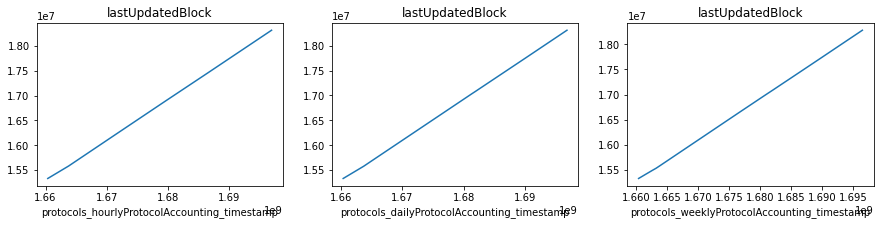

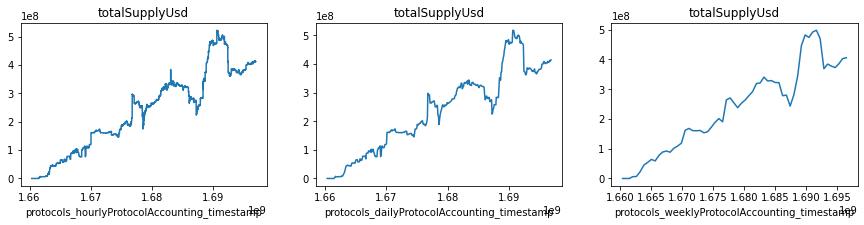

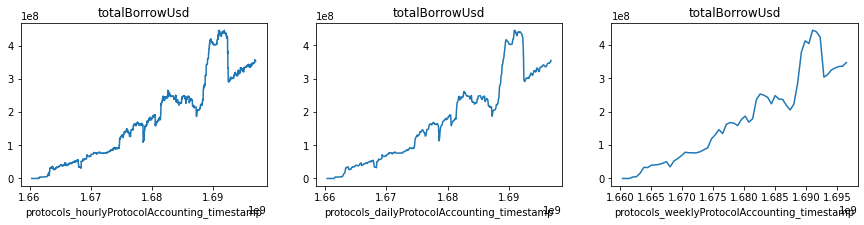

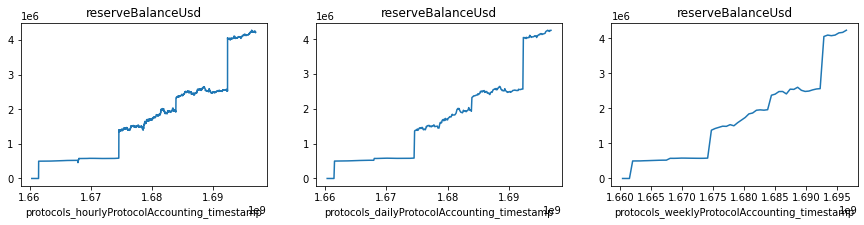

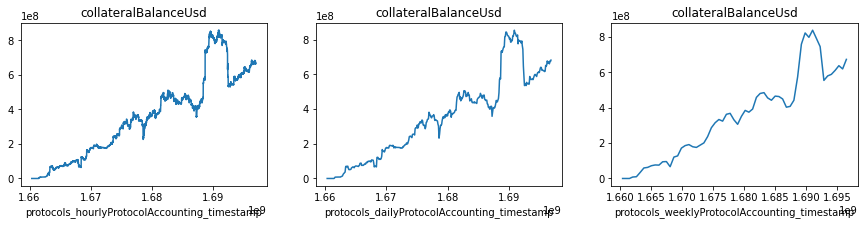

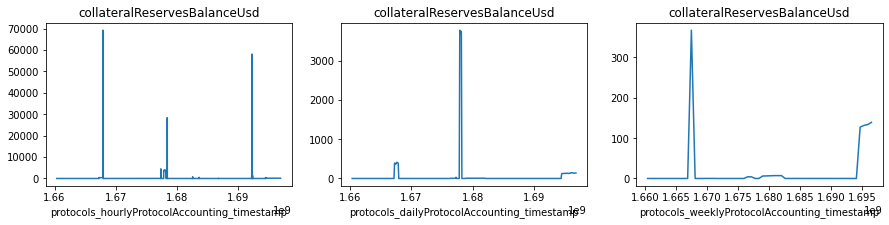

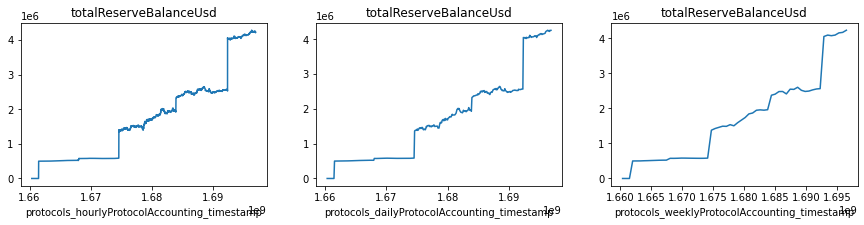

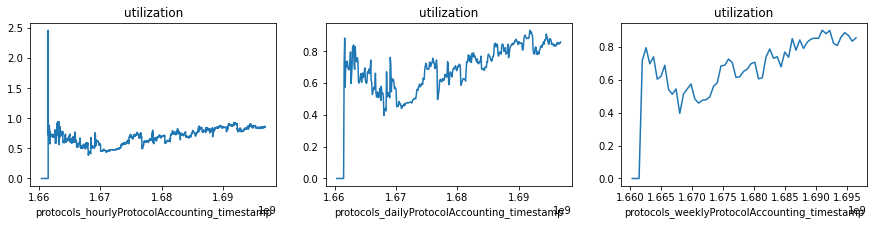

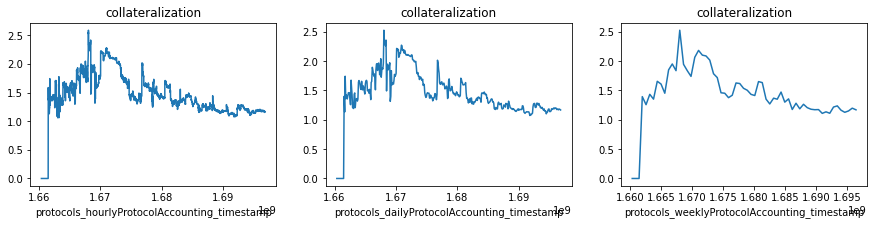

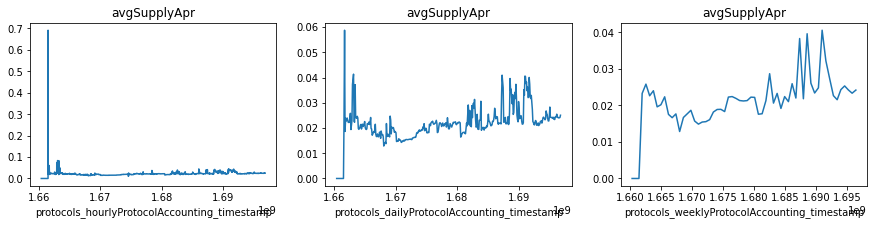

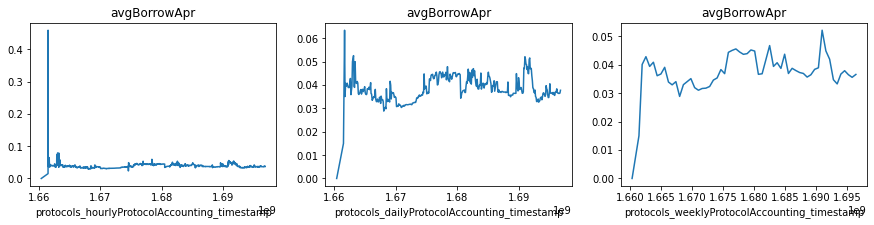

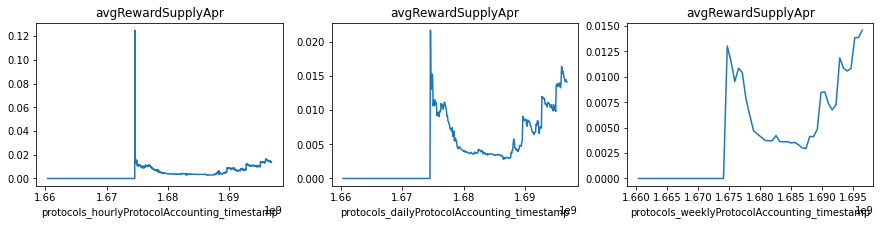

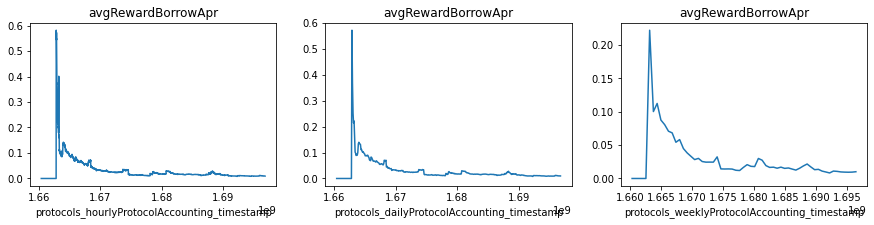

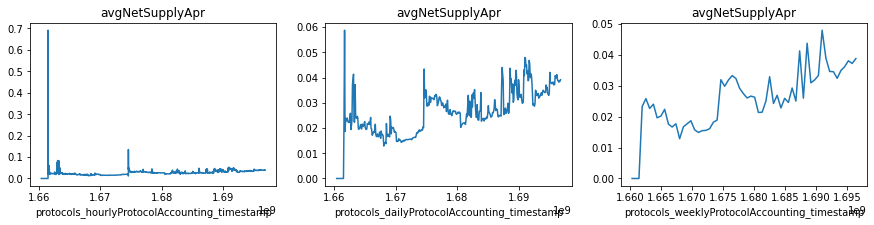

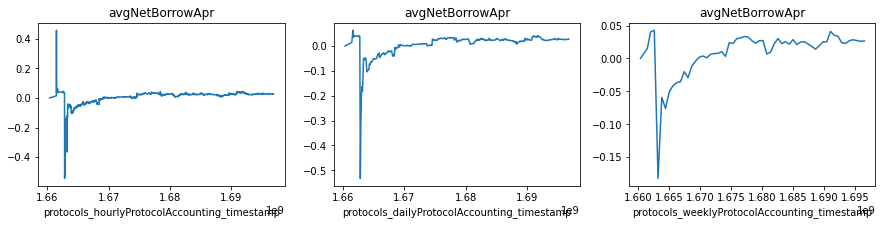

In [38]:
# Protocol Historical Accounting

hourly = comp_v3.Query.protocols.hourlyProtocolAccounting(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyProtocolAccounting(orderBy="timestamp", first=100000000)
weekly = comp_v3.Query.protocols.weeklyProtocolAccounting(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

plot_all([hourly_df, daily_df, weekly_df], ["protocols_hourlyProtocolAccounting_timestamp", "protocols_dailyProtocolAccounting_timestamp", "protocols_weeklyProtocolAccounting_timestamp"], "Protocol Accounting (hourly, daily, weekly)")


Protocol Usage (hourly, daily)


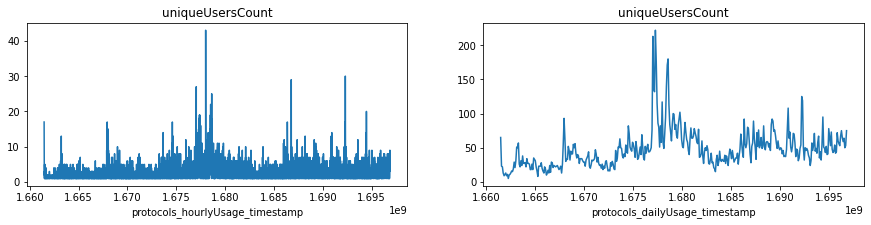

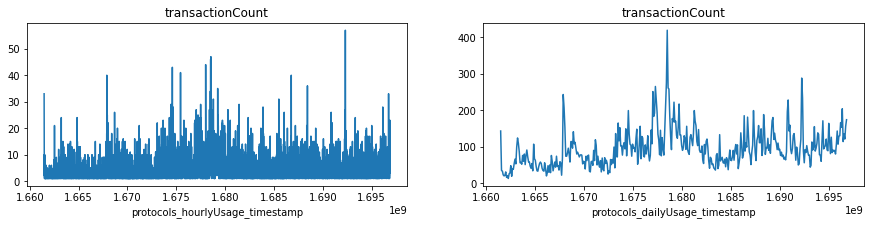

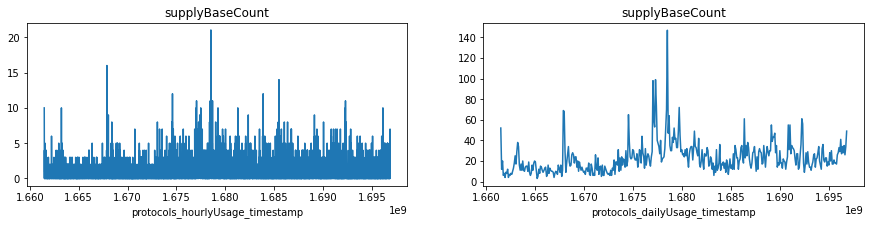

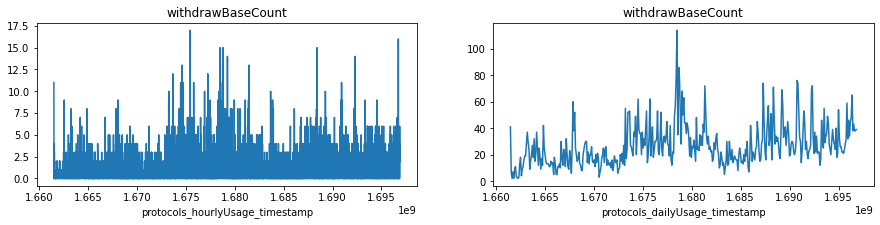

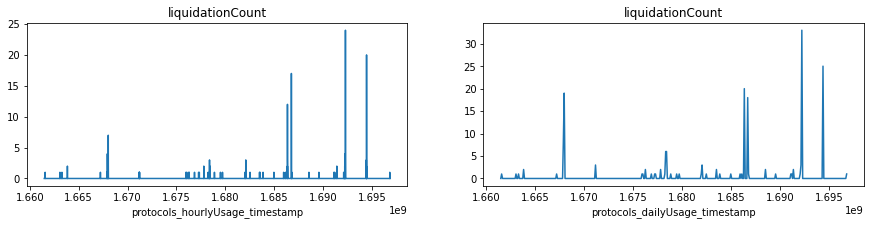

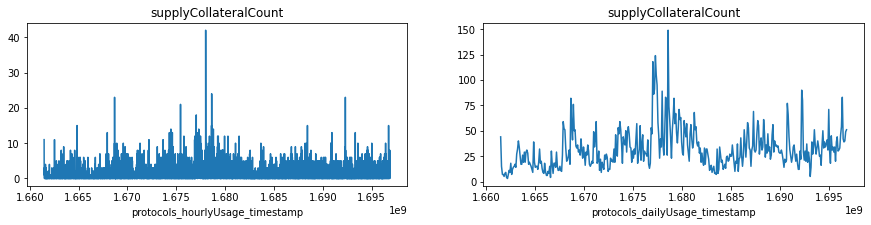

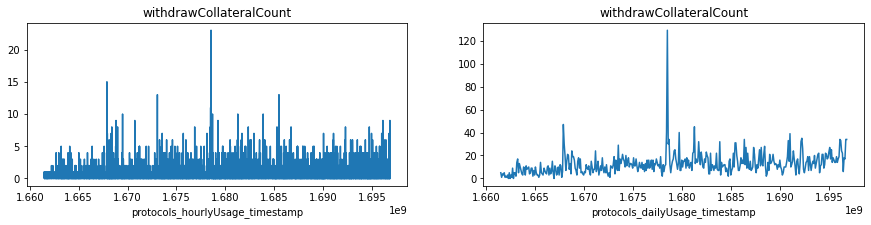

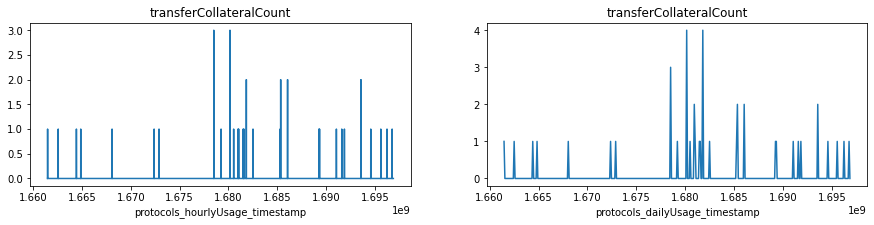

In [39]:
# Protocol historical usage

hourly = comp_v3.Query.protocols.hourlyUsage(orderBy="timestamp", first=100000000)
daily = comp_v3.Query.protocols.dailyUsage(orderBy="timestamp", first=100000000)

hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

# display(hourly_df)

plot_all([hourly_df, daily_df], ["protocols_hourlyUsage_timestamp", "protocols_dailyUsage_timestamp"], "Protocol Usage (hourly, daily)")


Compound WETH - Market Accounting (hourly, daily, weekly)


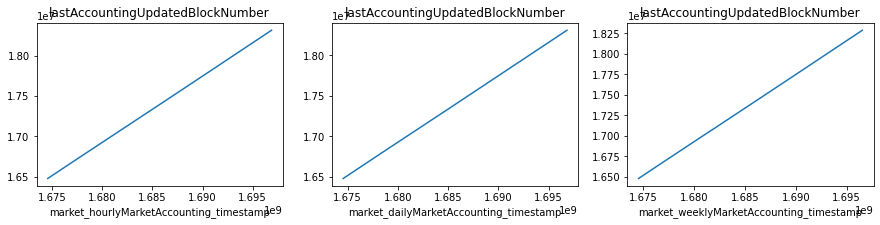

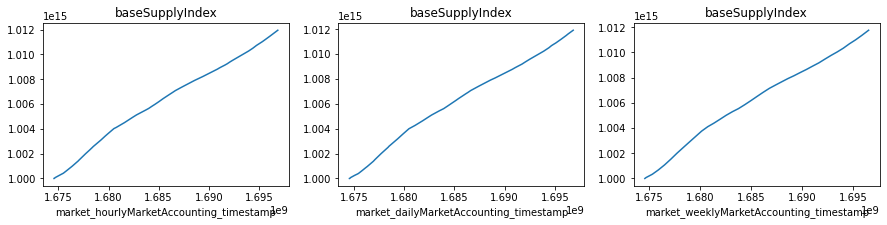

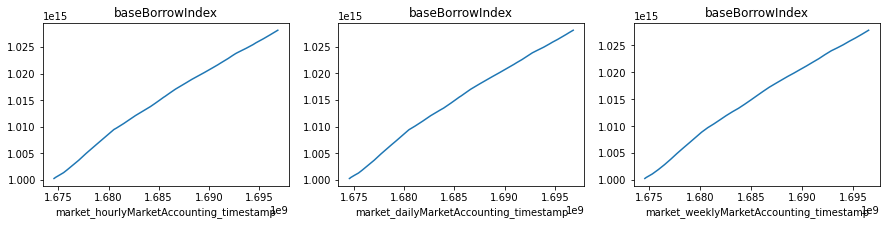

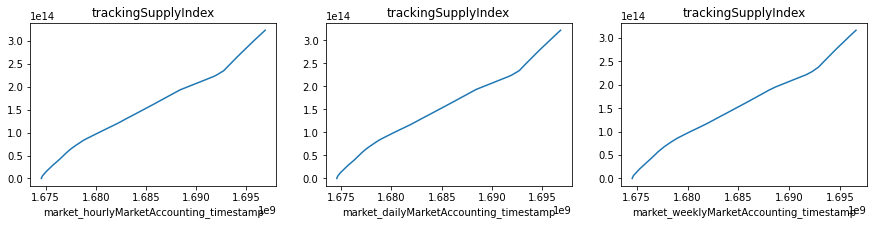

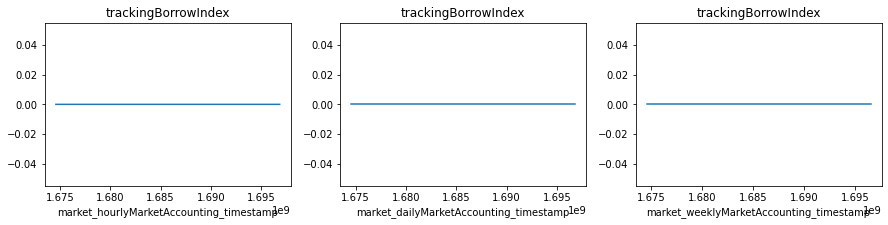

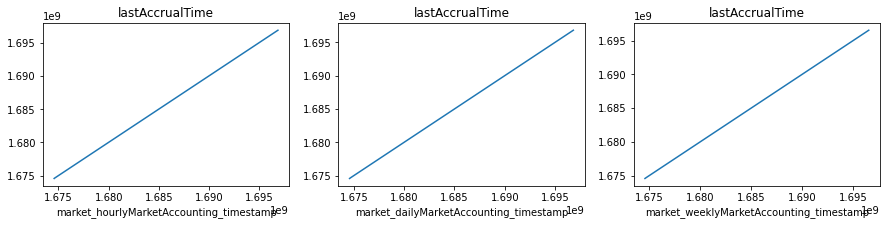

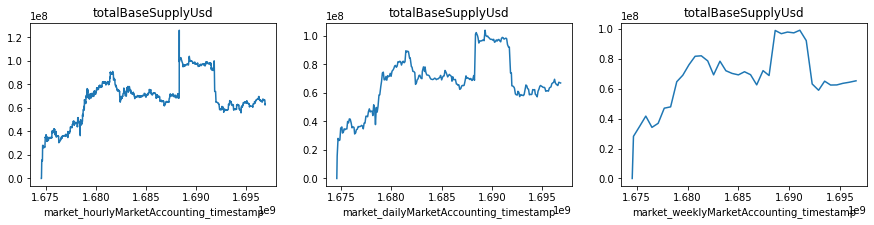

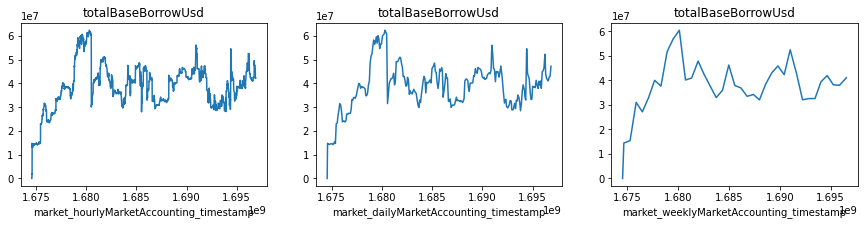

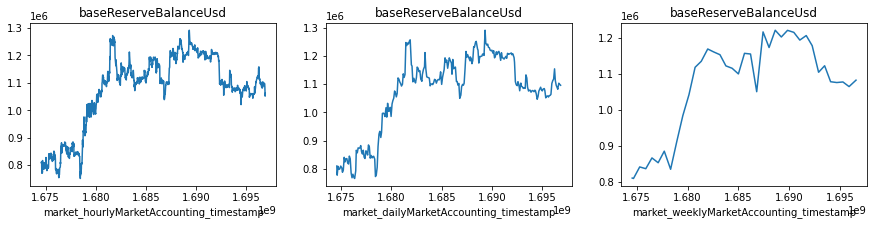

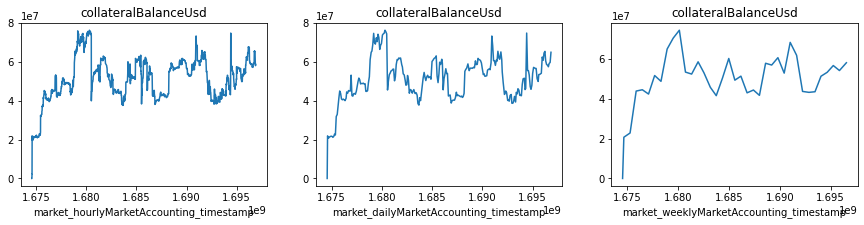

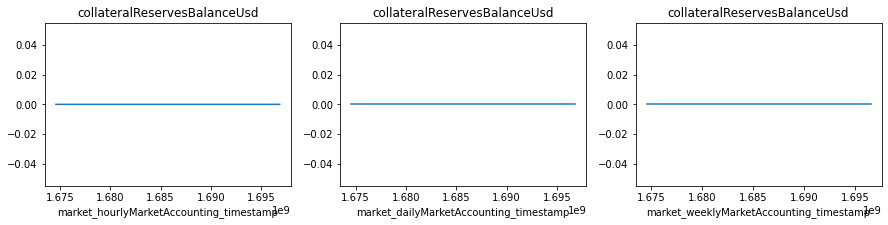

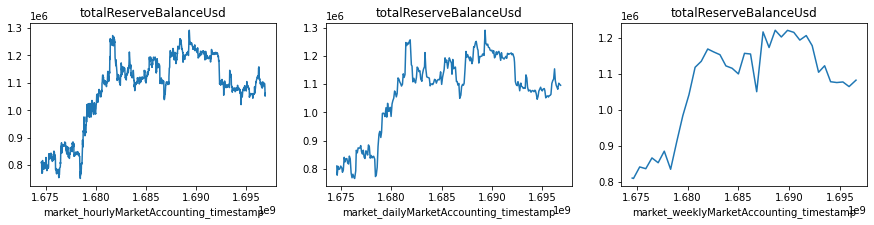

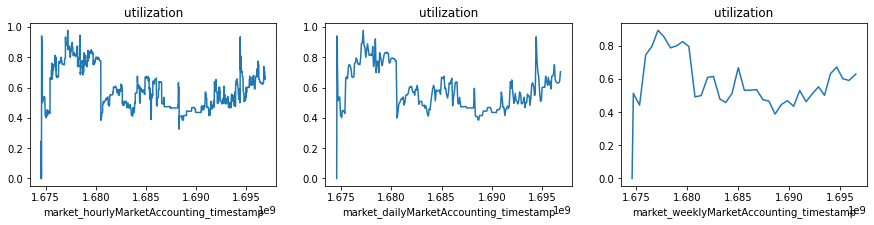

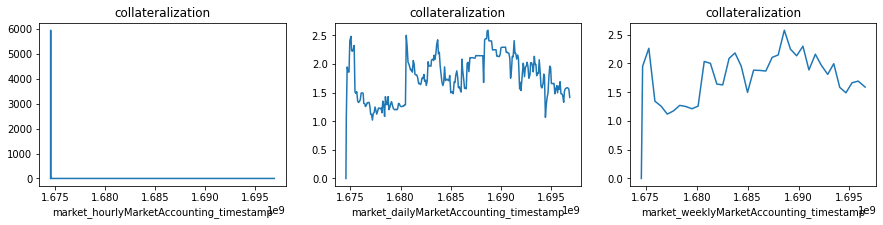

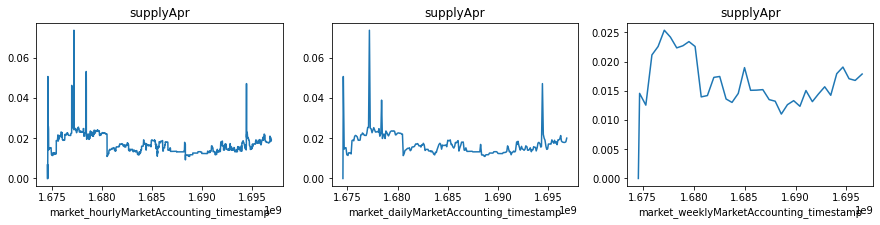

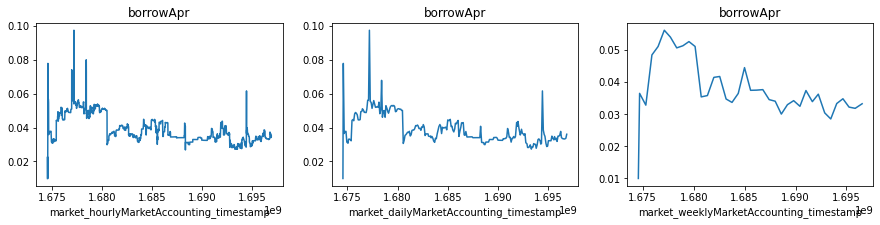

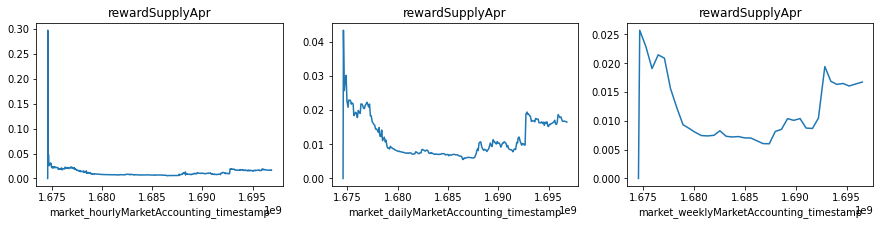

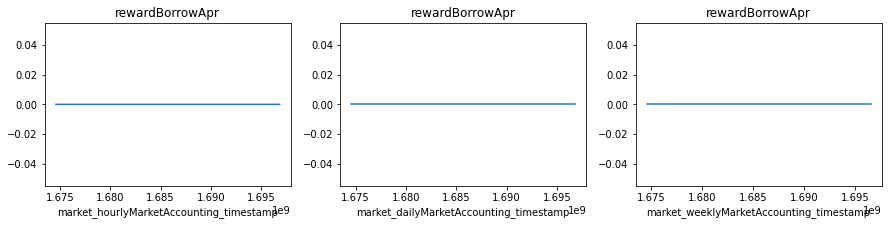

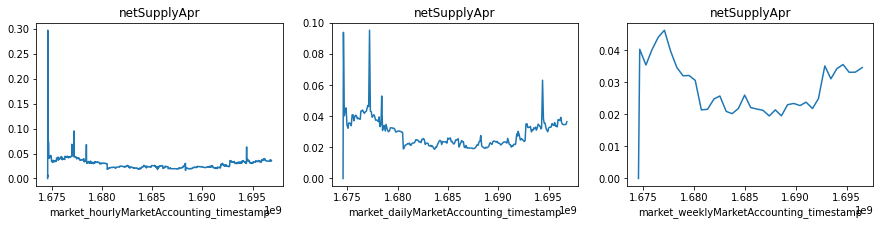

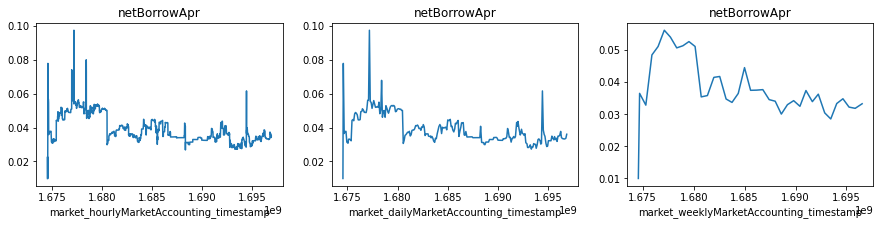

Compound USDC - Market Accounting (hourly, daily, weekly)


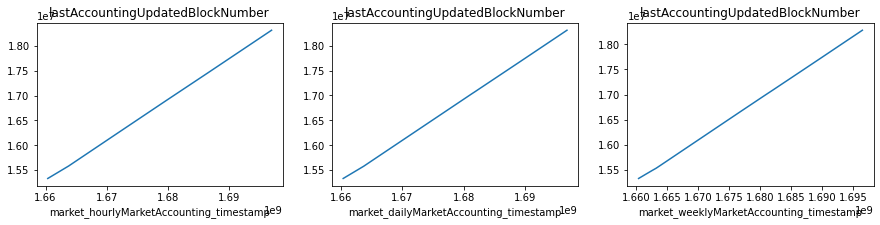

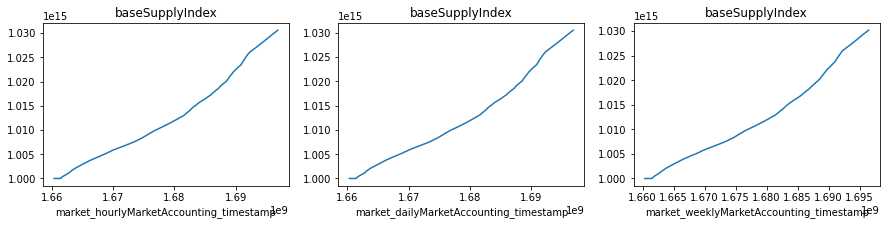

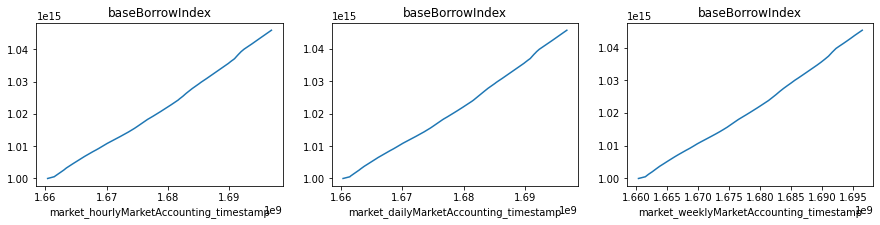

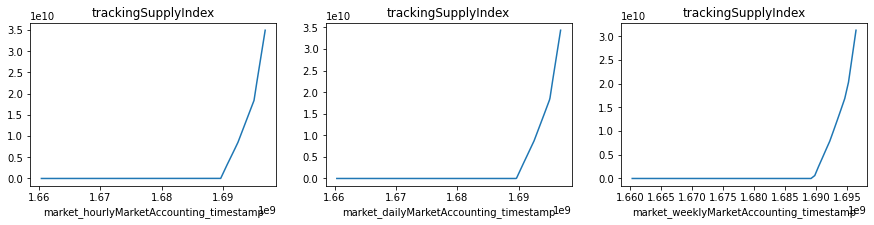

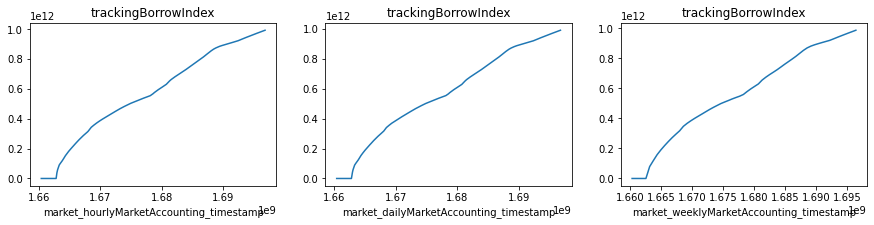

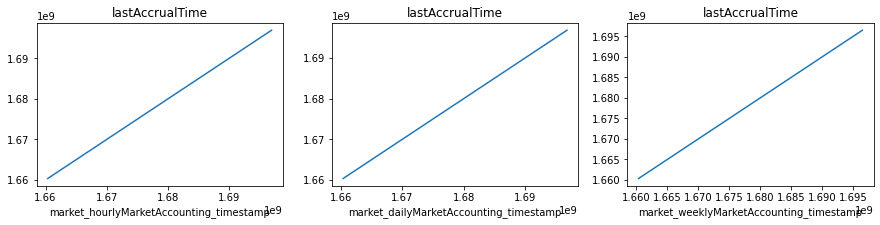

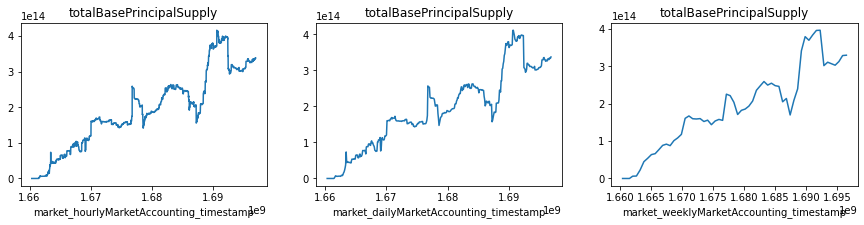

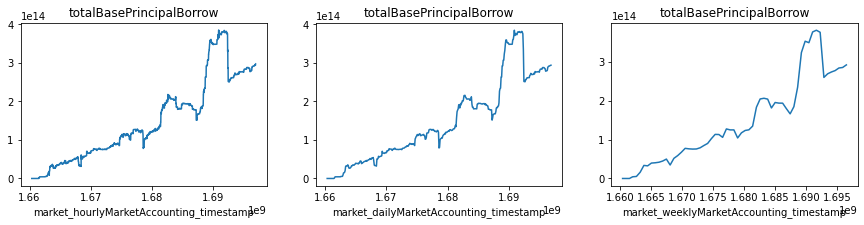

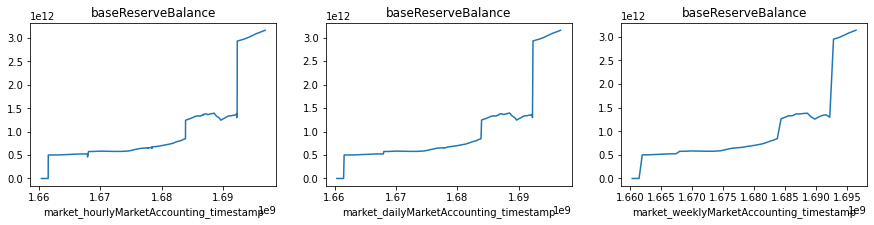

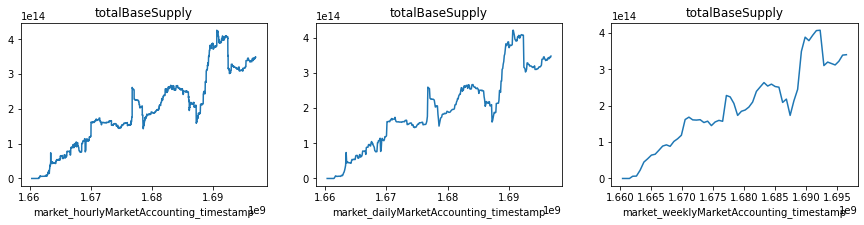

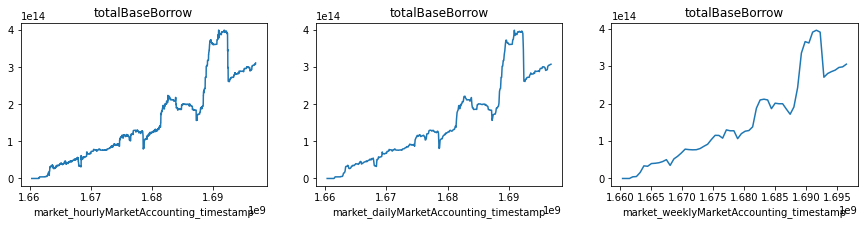

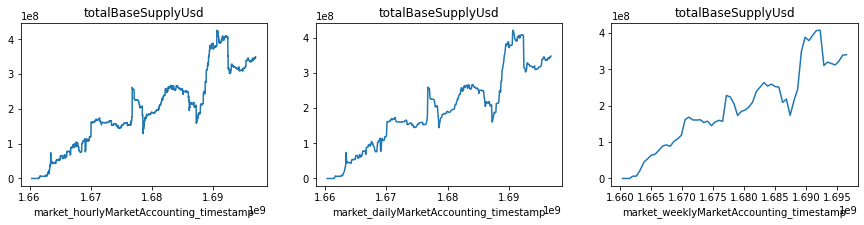

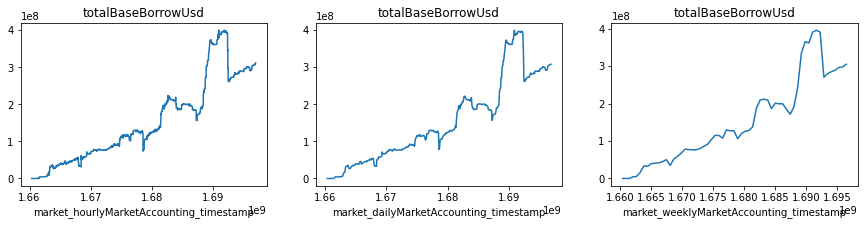

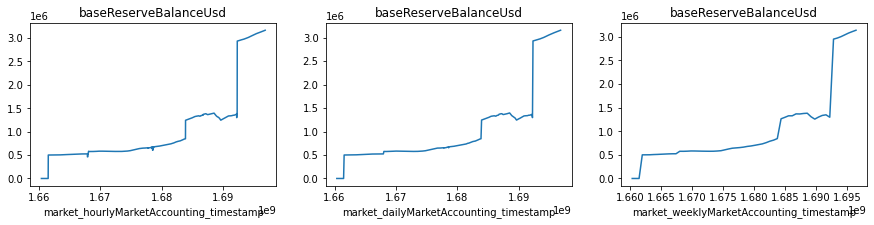

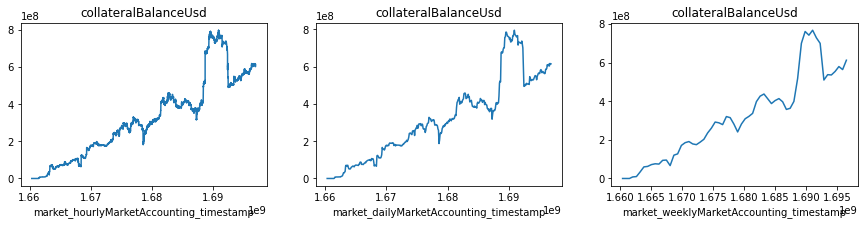

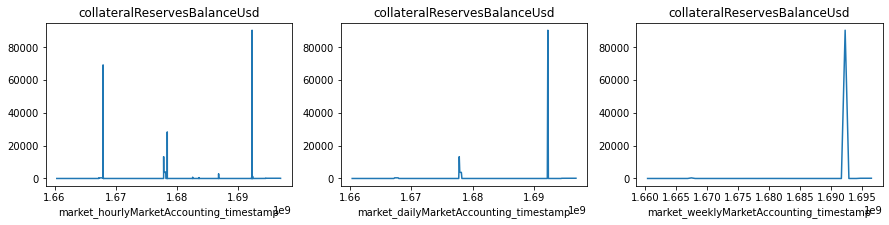

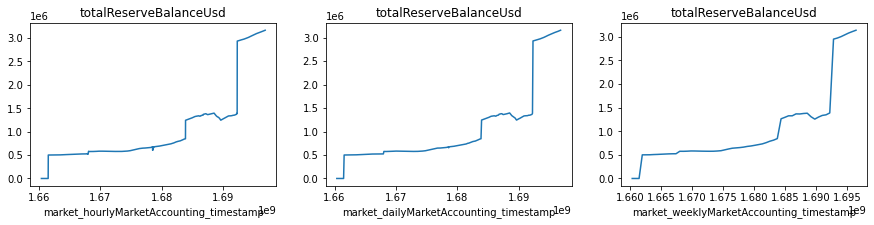

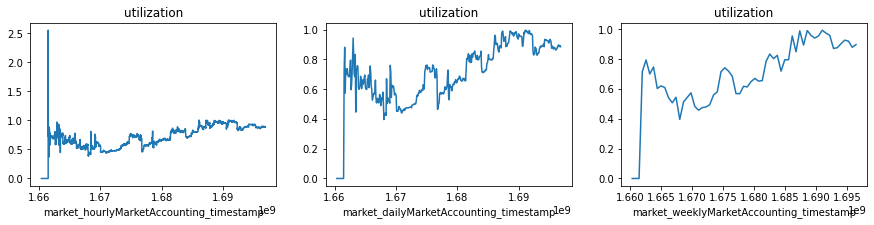

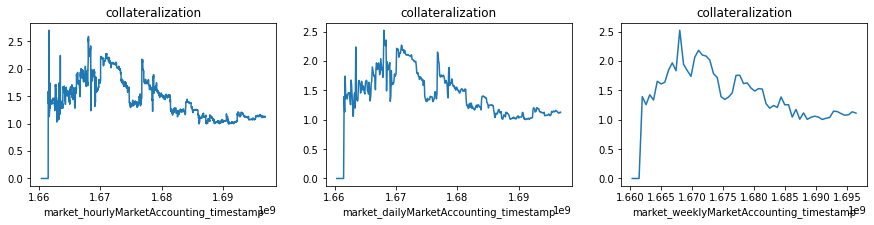

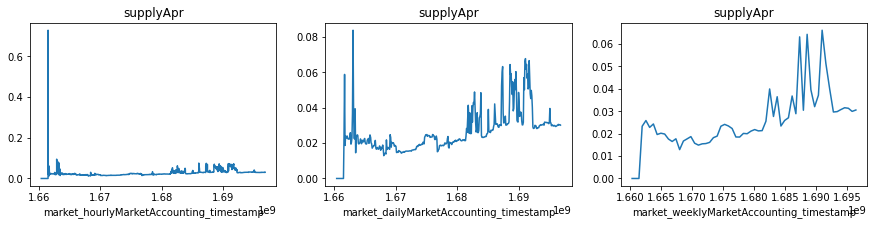

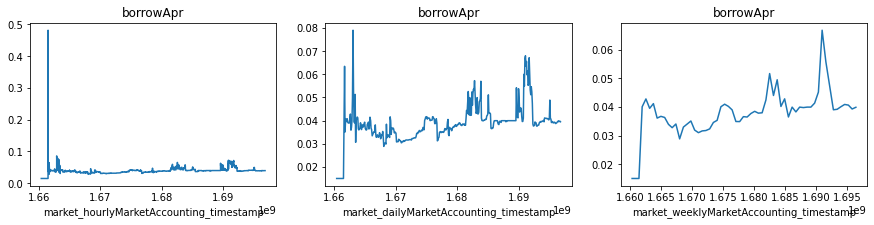

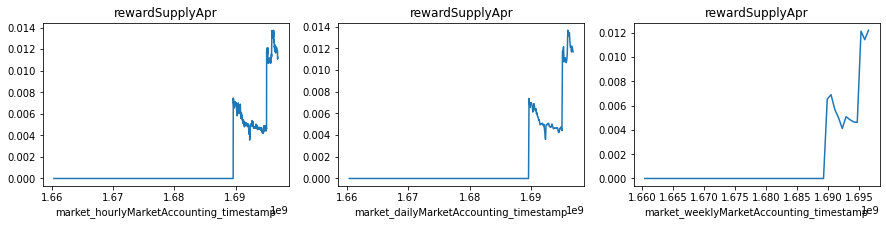

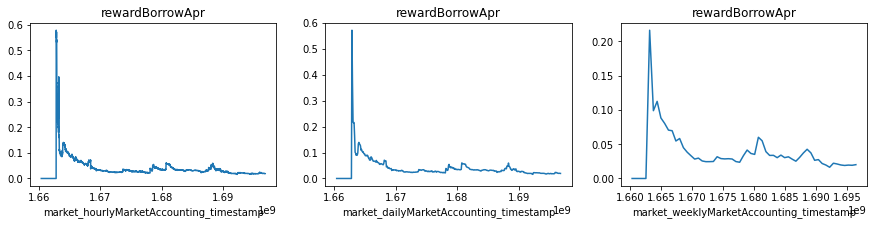

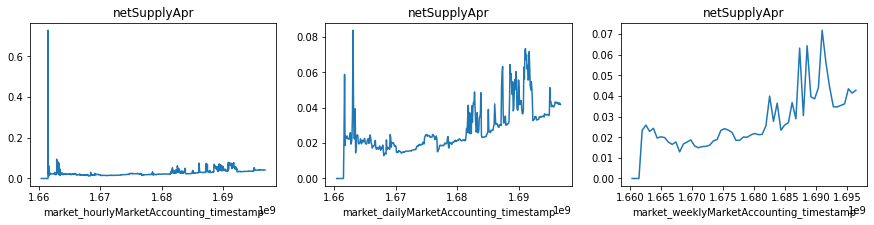

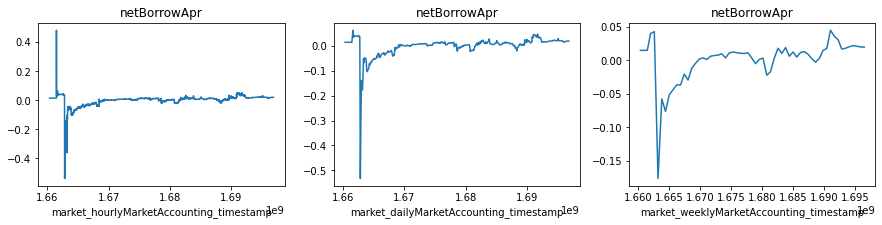

In [40]:
# Market Historical Accounting

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyMarketAccounting(orderBy="timestamp", first=100000000)
    daily = market.dailyMarketAccounting(orderBy="timestamp", first=100000000)
    weekly = market.weeklyMarketAccounting(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.accounting], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.accounting], concat=True)
    weekly_df = sg.query_df([weekly.timestamp, weekly.accounting], concat=True)

    plot_all([hourly_df, daily_df, weekly_df], ["market_hourlyMarketAccounting_timestamp", "market_dailyMarketAccounting_timestamp", "market_weeklyMarketAccounting_timestamp"], f"{market_name} - Market Accounting (hourly, daily, weekly)")

Compound WETH - Market Configuration


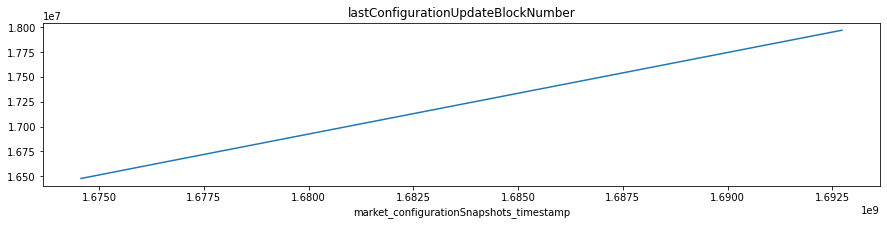

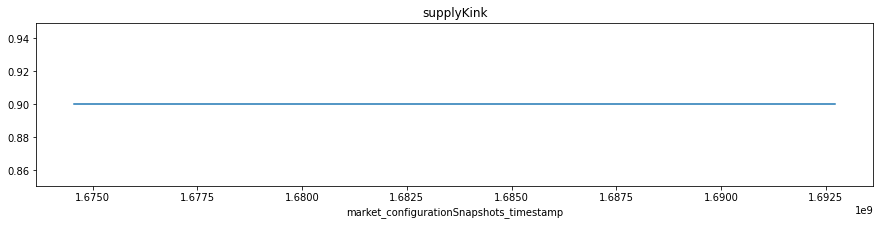

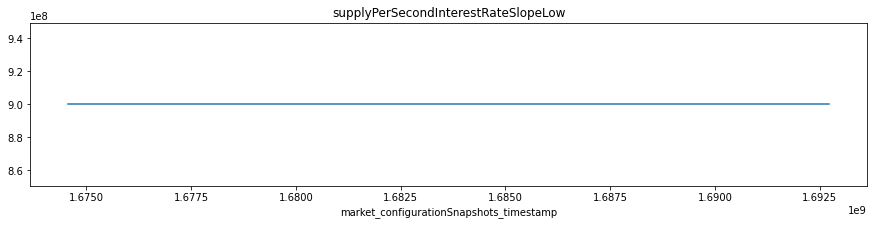

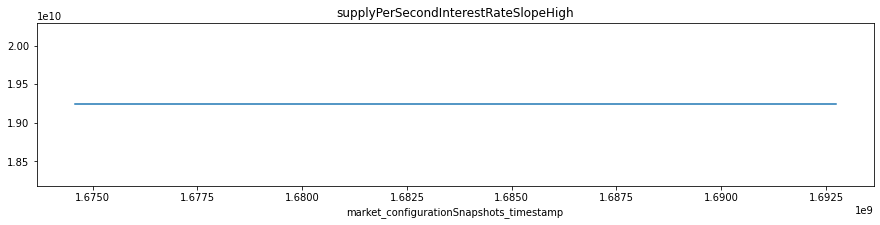

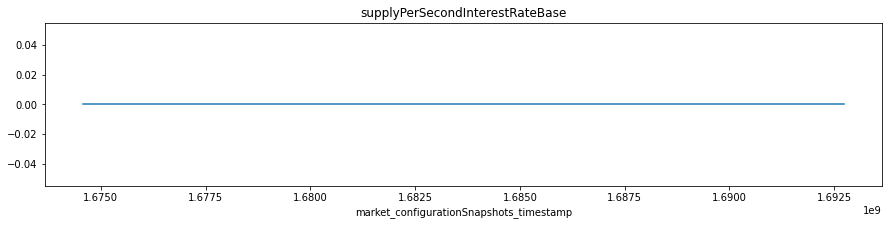

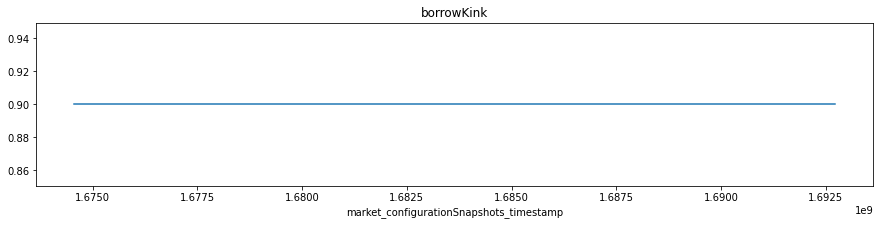

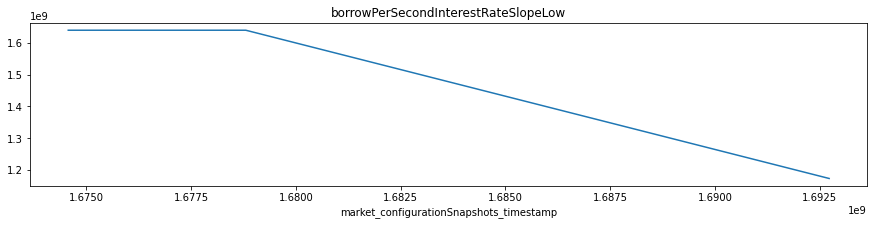

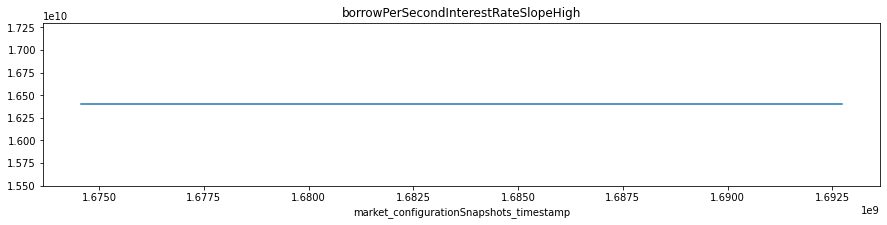

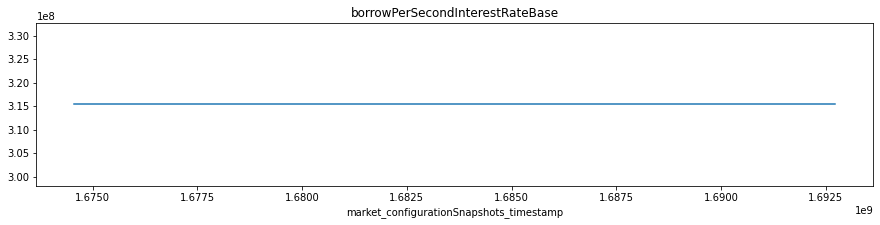

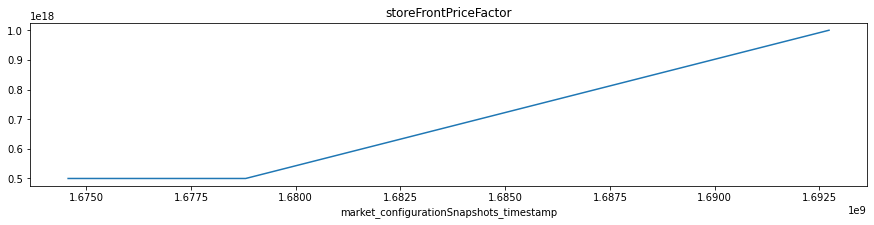

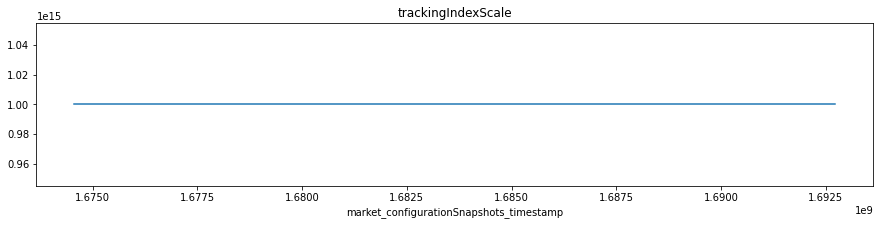

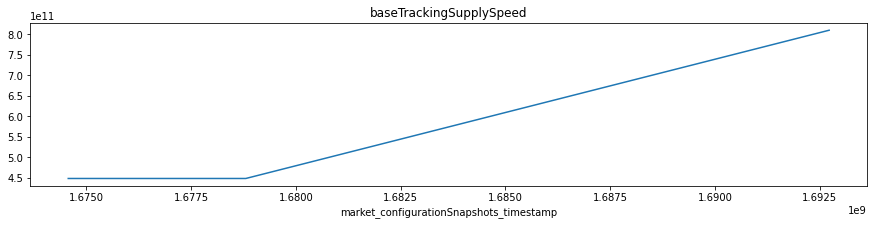

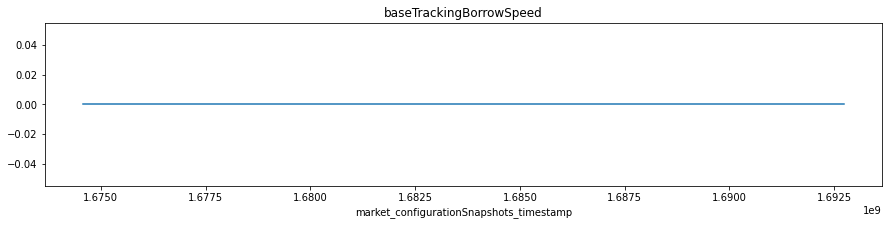

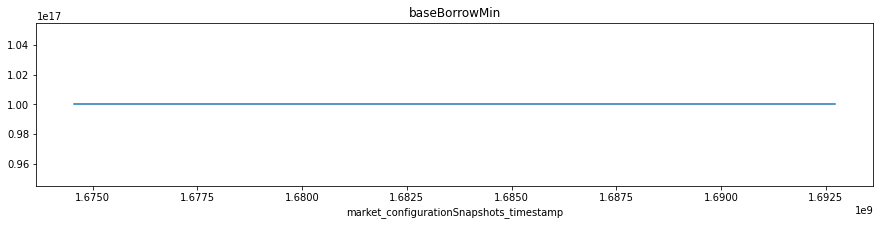

Compound USDC - Market Configuration


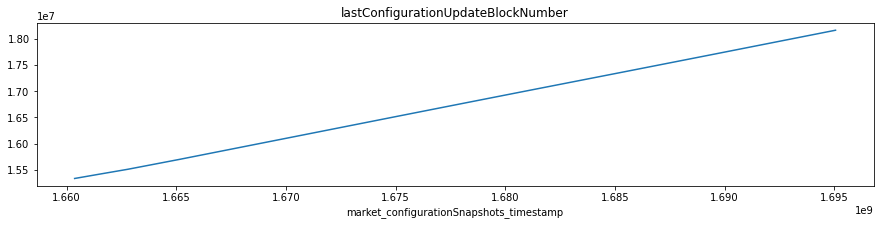

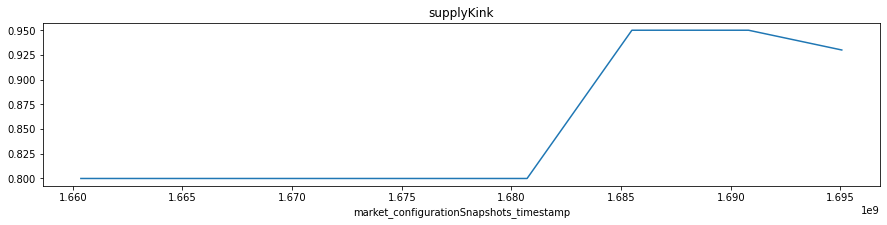

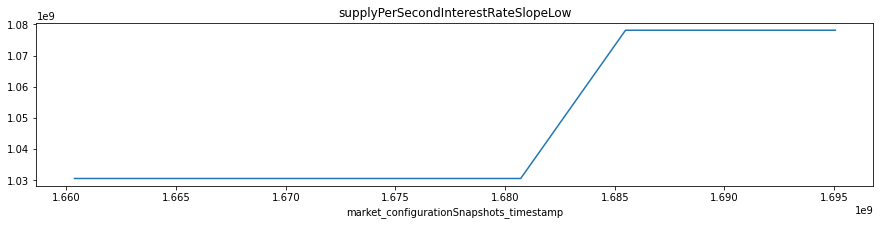

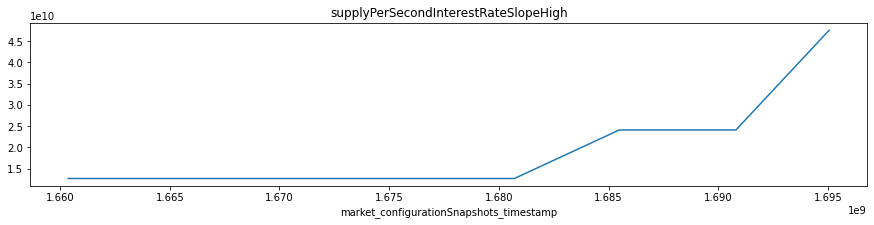

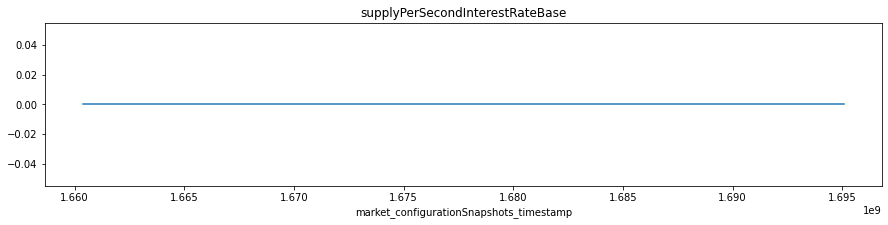

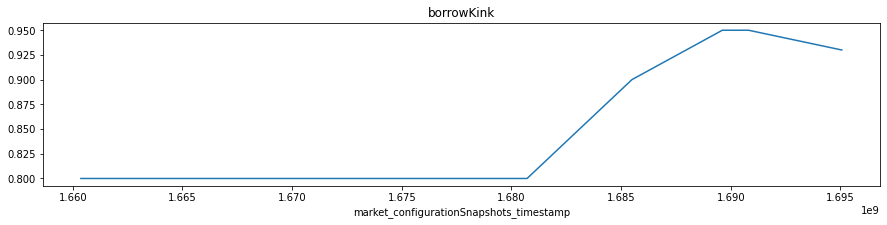

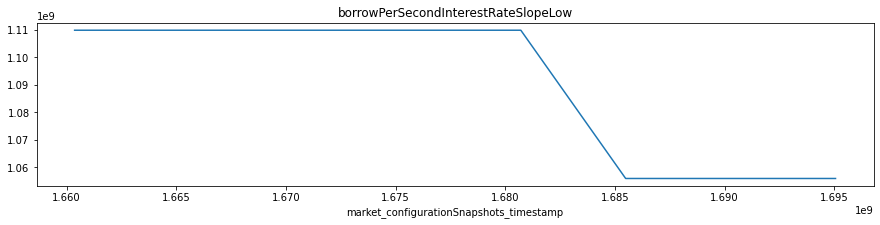

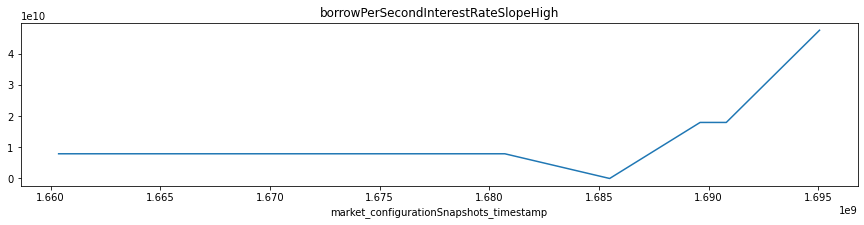

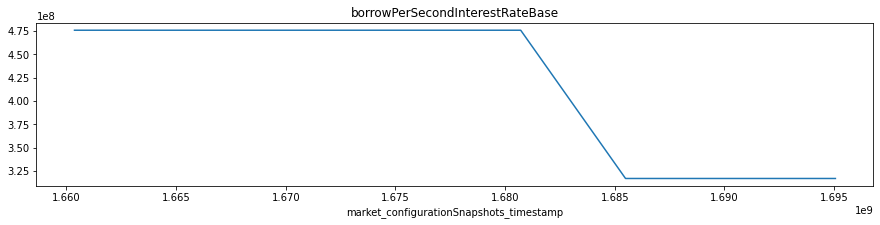

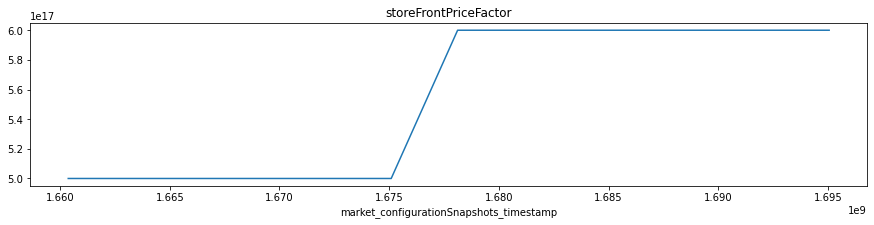

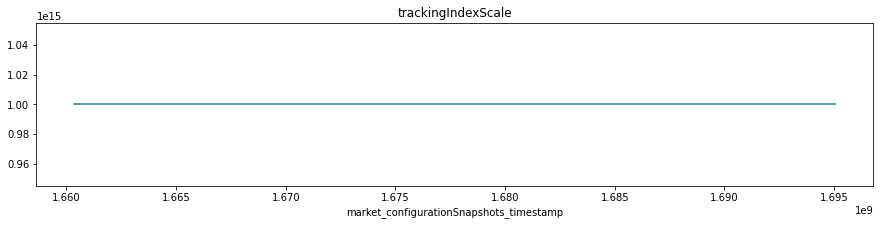

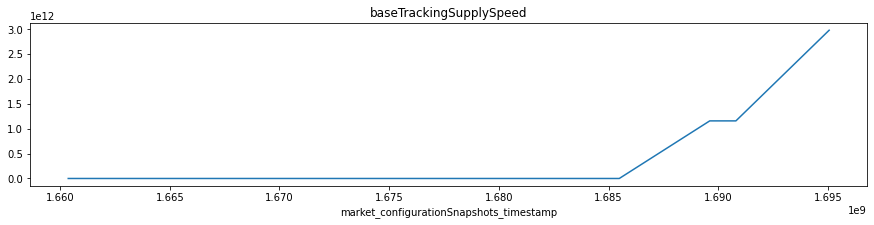

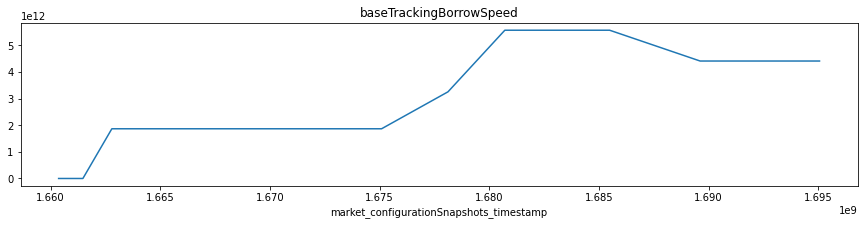

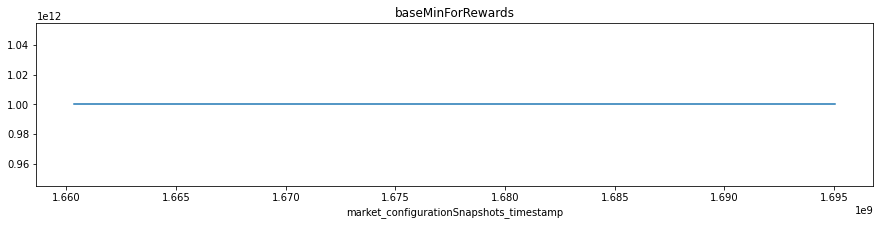

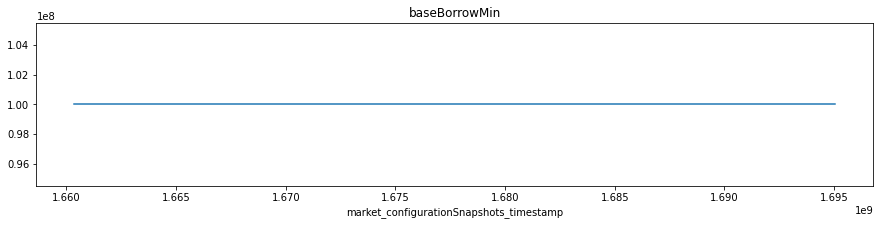

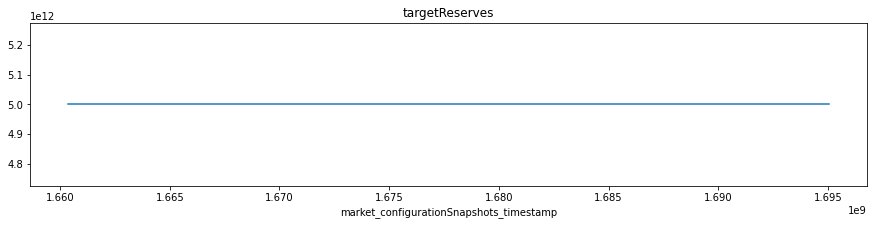

In [41]:
# Market Historical Configuration

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    snapshots = market.configurationSnapshots(orderBy="timestamp", first=100000000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.configuration], concat=True)

    # display(snapshots_df)

    plot_all([snapshots_df], ["market_configurationSnapshots_timestamp"], f"{market_name} - Market Configuration") 

Compound WETH - Market Usage (hourly, daily)


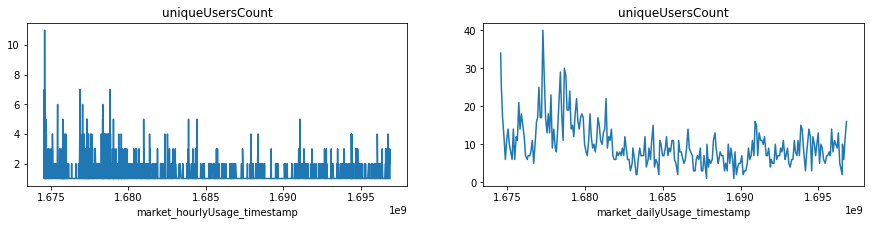

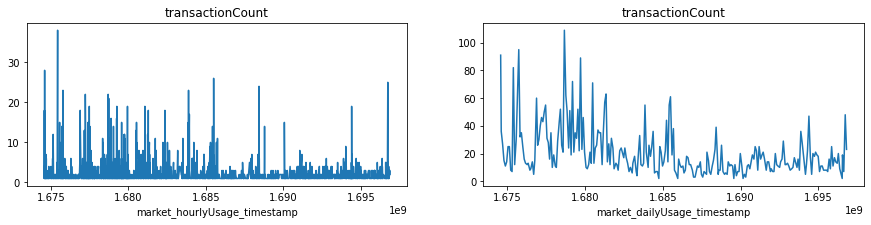

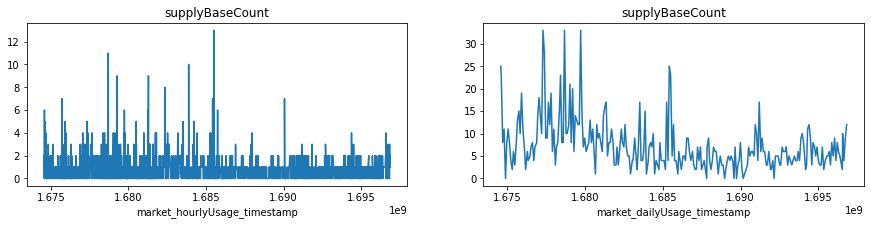

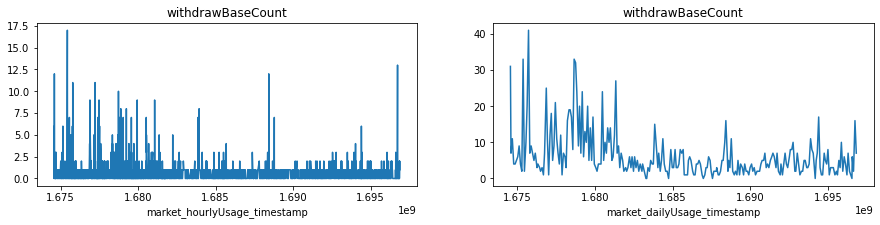

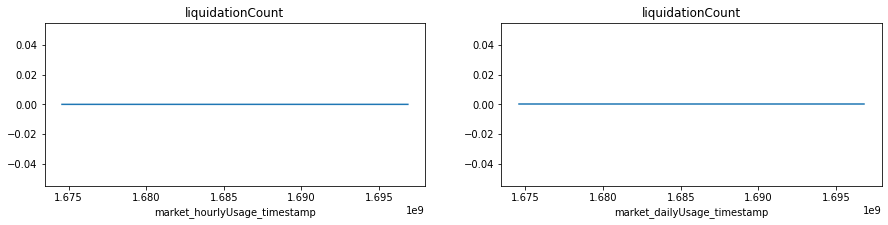

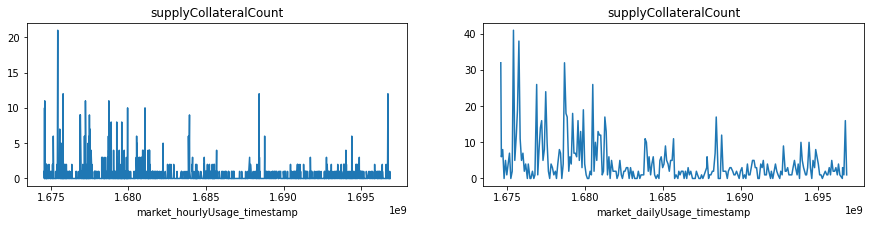

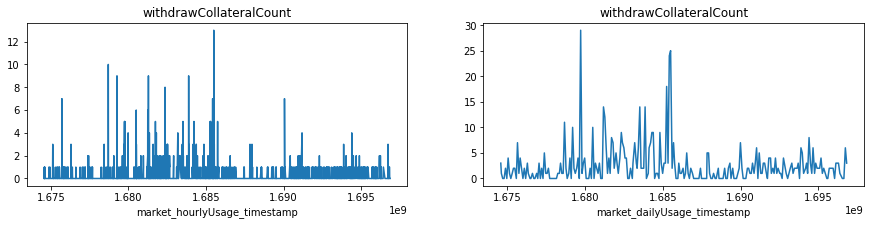

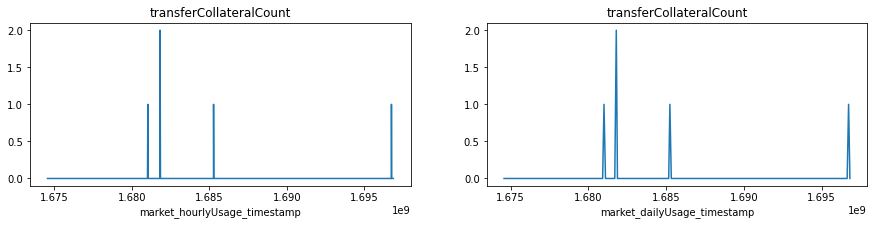

Compound USDC - Market Usage (hourly, daily)


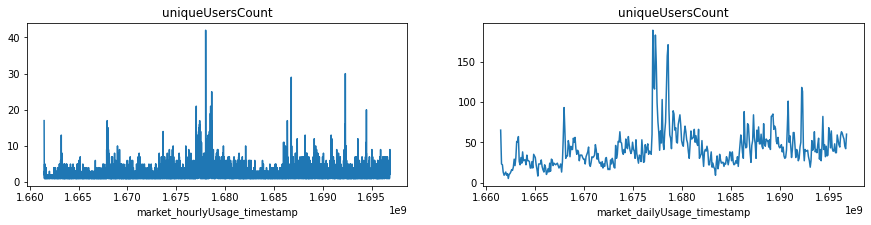

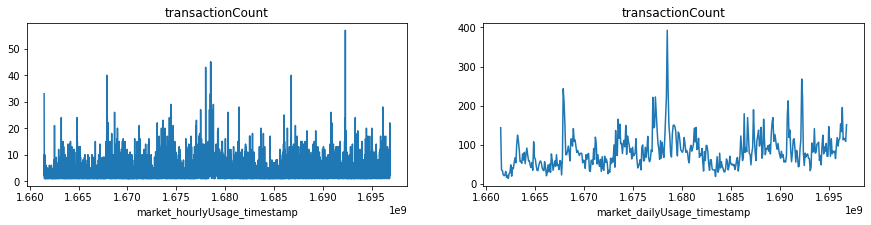

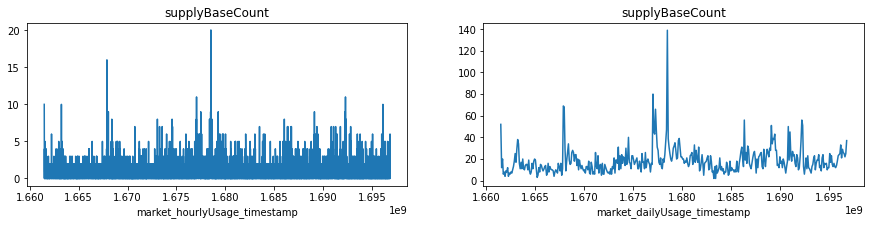

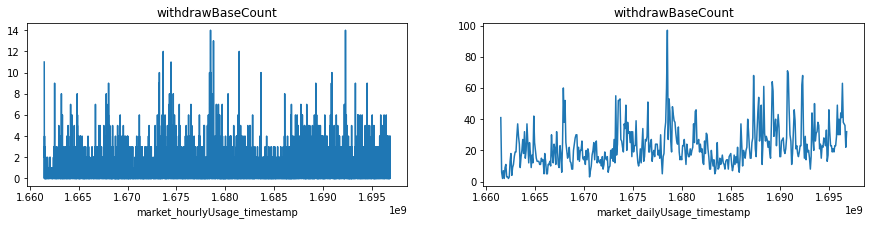

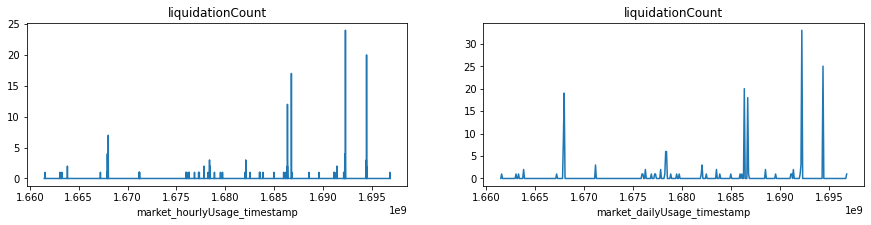

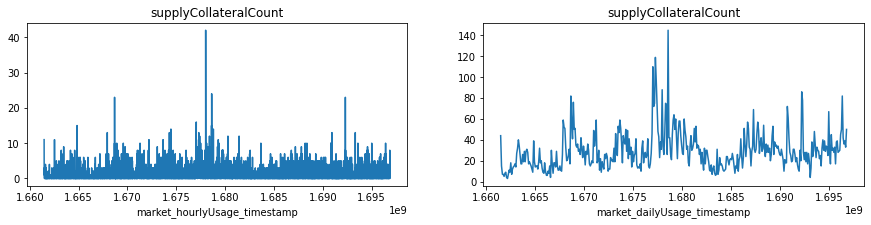

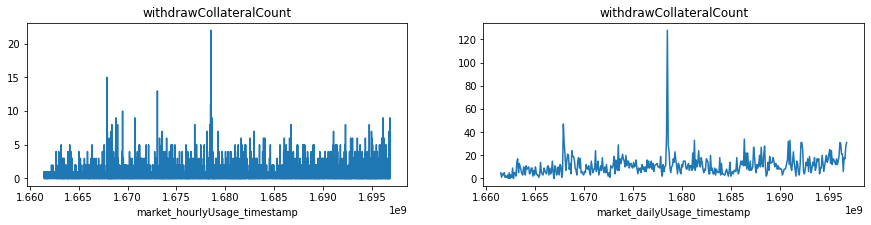

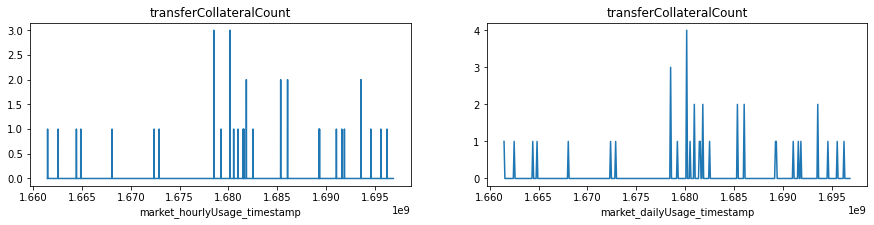

In [42]:
# Market Historical Usage

markets = comp_v3.Query.markets()
markets_info = sg.query_df([markets.id, markets.configuration.name])

for index, row in markets_info.iterrows():
    market_name = row["markets_configuration_name"]
    market_id = row["markets_id"]

    market = comp_v3.Query.market(id=market_id)
    hourly = market.hourlyUsage(orderBy="timestamp", first=100000000)
    daily = market.dailyUsage(orderBy="timestamp", first=100000000)

    hourly_df = sg.query_df([hourly.timestamp, hourly.usage], concat=True)
    daily_df = sg.query_df([daily.timestamp, daily.usage], concat=True)

    # display(hourly_df)

    plot_all([hourly_df, daily_df], ["market_hourlyUsage_timestamp", "market_dailyUsage_timestamp"], f"{market_name} - Market Usage (hourly, daily)")

position_positionAccountingSnapshots_timestamp  \
0                                      1674602939   
1                                      1674603359   
2                                      1676034623   
3                                      1688312639   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16479956                        
1                                           16479991                        
2                                           16598568                        
3                                           17607287                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9410d8...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                                                  0              
1                            -2699152246434178339105              
2                                                  0              
3                            29767562379533695489604              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                                                  0            
1                            -2699998106643255971550            
2                                                  0            
3                            29999928024283075857734            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                                  0                   
1                                                  0                   
2                                     34872010497335                   
3                                    192401479542966                   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                       0.000000e+00                
1                                      -4.198082e+06                
2                                       0.000000e+00                
3                                       5.753476e+07                

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                       8.543577e+06                     
1                                       8.587201e+06                     
2                                       8.495690e+06                     
3                                       0.000000e+00

0x10d88638be3c26f3a47d861b8b5641508501035d - Position Accounting


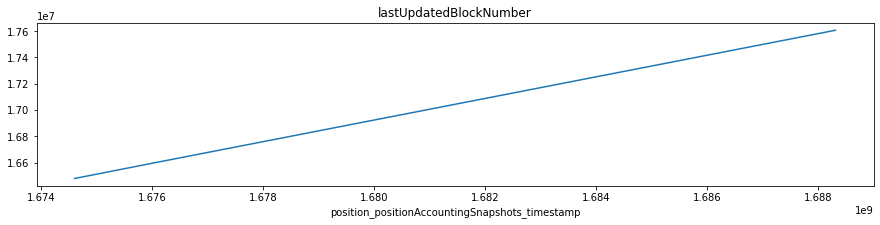

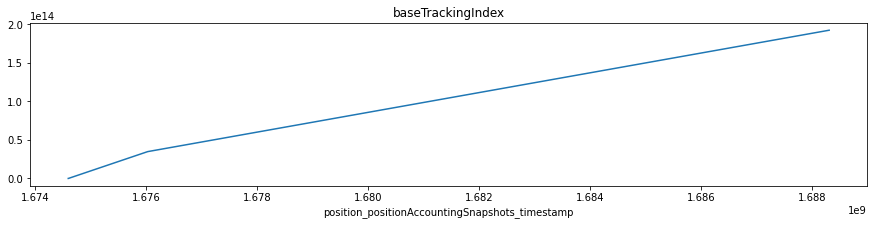

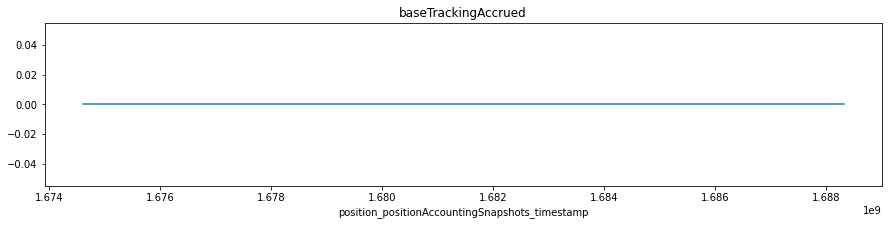

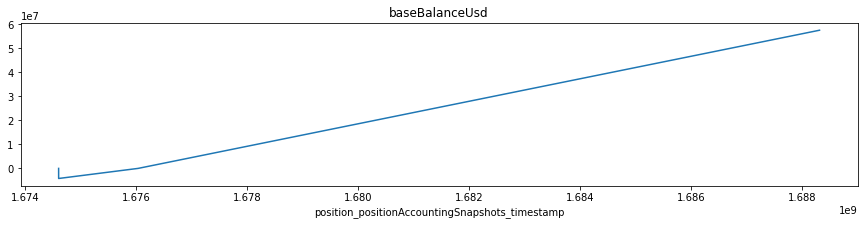

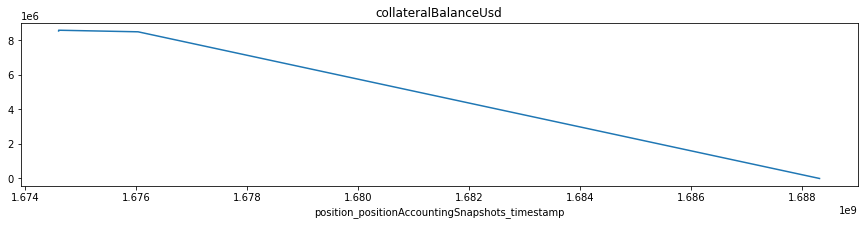

position_positionAccountingSnapshots_timestamp  \
0                                      1674955307   
1                                      1678188611   
2                                      1679226011   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16509163                        
1                                           16776136                        
2                                           16861529                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9459a6...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                             4998992912709162021052              
1                             9987274672306803706351              
2                             6488079088093233054305              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                             4999911608071404274188            
1                            10010652824233716372746            
2                             6508075815131431149190            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                     13160348387806                   
1                                     74986062056113                   
2                                     88416382695334                   

   position_positionAccountingSnapshots_accounting_baseTrackingAccrued  \
0                                                  0                     
1                                          309066304                     
2                                          443198605                     

   position_positionAccountingSnapshots_accounting_baseBalanceUsd  \
0                                       8.074072e+06                
1                                       1.565155e+07                
2                                       1.157396e+07                

   position_positionAccountingSnapshots_accounting_collateralBalanceUsd  
0                                                0.0                     
1                                                0.0                     
2                                                0.0

0x59a661f1c909ca13ba3e9114bfdd81e5a420705d - Position Accounting


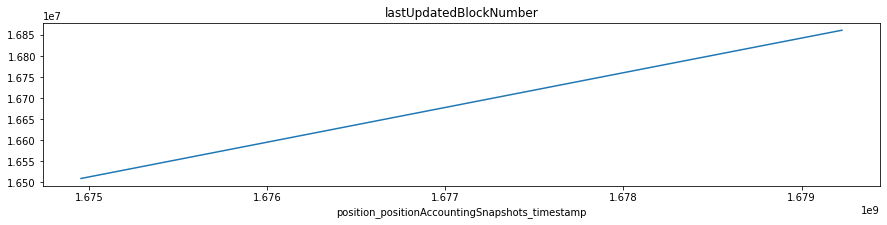

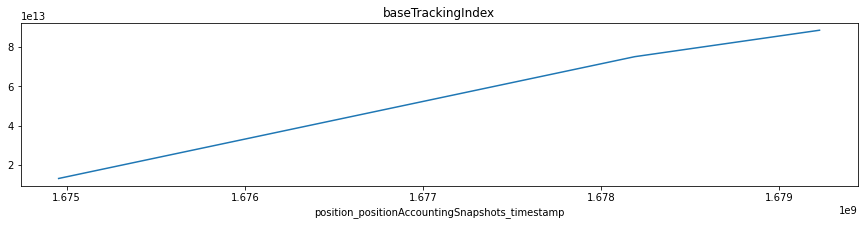

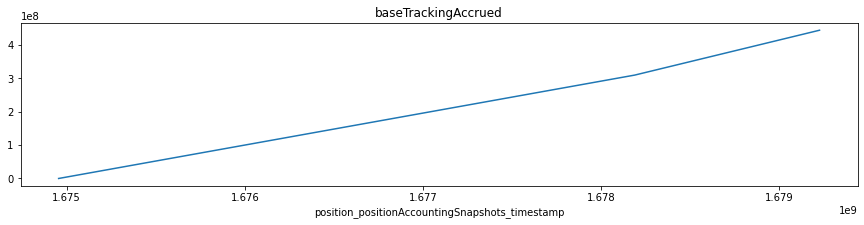

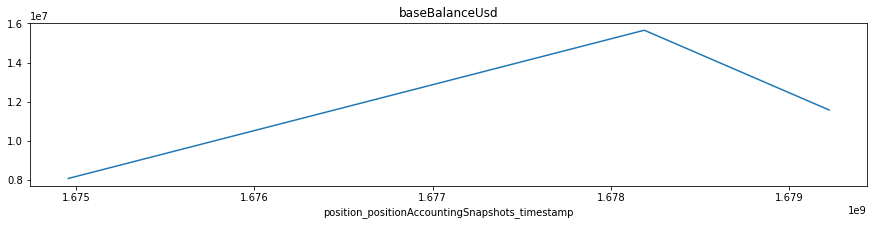

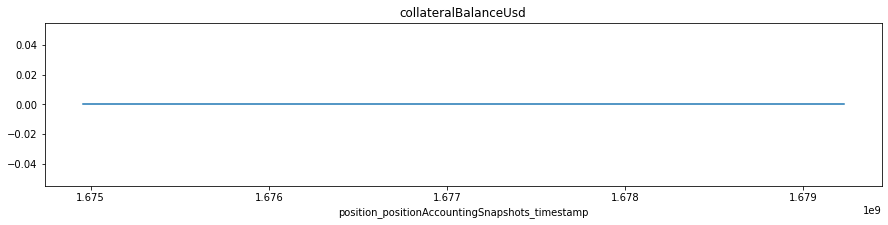

position_positionAccountingSnapshots_timestamp  \
0                                      1679002895   
1                                      1679100707   
2                                      1679360075   
3                                      1679442551   
4                                      1679885543   
5                                      1682127167   
6                                      1684661087   
7                                      1685230535   

  position_positionAccountingSnapshots_accounting_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...   

   position_positionAccountingSnapshots_accounting_lastUpdatedBlockNumber  \
0                                           16843139                        
1                                           16851201                        
2                                           16872582                        
3                                           16879374                        
4                                           16915875                        
5                                           17098634                        
6                                           17306840                        
7                                           17353697                        

  position_positionAccountingSnapshots_accounting_position_id  \
0  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
1  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
2  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
3  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
4  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
5  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
6  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            
7  0xa17581a9e3356d9a858b789d68b4d866e593ae9453fb...            

  position_positionAccountingSnapshots_accounting_basePrincipal  \
0                             1495611660639103045586              
1                             2492619296932021036835              
2                             2991031405264710325736              
3                             3190383911296082389104              
4                             3489316150252825313068              
5                             3986932876790128048818              
6                             4483952340191455567254              
7                             4980811694321167274634              

  position_positionAccountingSnapshots_accounting_baseBalance  \
0                             1499990178355031585977            
1                             2500088549794042714902            
2                             3000552292453074893445            
3                             3200711974448191151470            
4                             3501766242833111436321            
5                             4005965943630807550749            
6                             4510820644717455882591            
7                             5012280015104866714001            

   position_positionAccountingSnapshots_accounting_baseTrackingIndex  \
0                                     85982717498315                   
1                                     87069160046370                   
2                                     89962606939617                   
3                                     90900692417078                   
4                                     95842004816751                   
5                                    119572607681471                   
6                                    149083070

0x53fb0162bc8d5eec2fb1532923c4f8997bace111 - Position Accounting


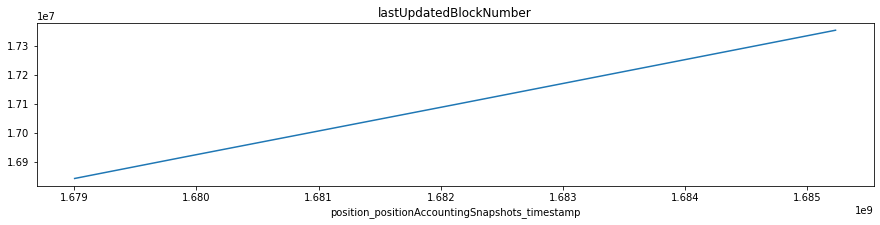

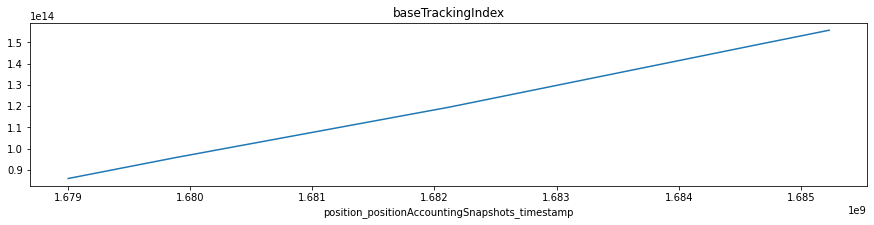

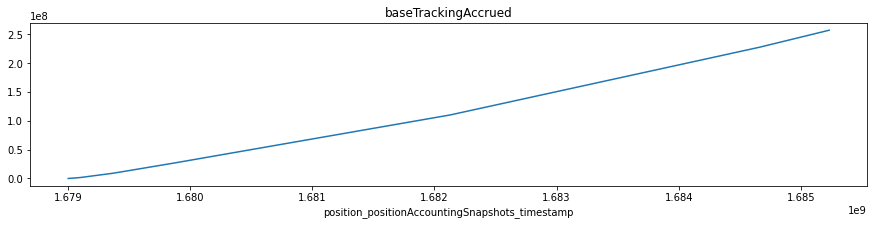

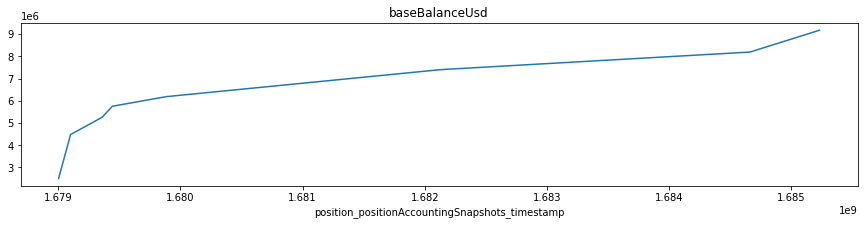

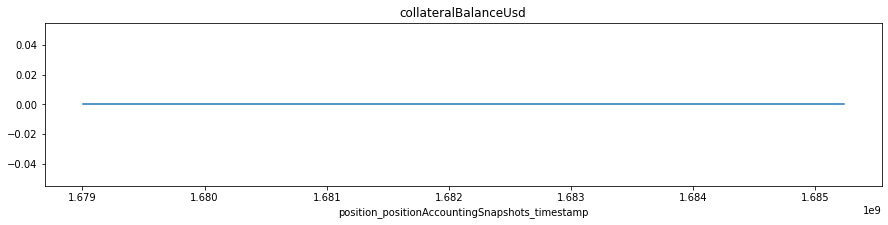

In [43]:
# Position Accounting 

positions = comp_v3.Query.positions(first=3, orderBy=comp_v3.Position.accounting.baseBalance, orderDirection="desc")
positions_df = sg.query_df([positions.id, positions.account.address])

# display(positions_df)

for index, row in positions_df.iterrows():
    position_address = row["positions_account_address"]
    position_id = row["positions_id"]

    snapshots = comp_v3.Query.position(id=position_id).positionAccountingSnapshots(orderBy="timestamp", first=10000)

    snapshots_df = sg.query_df([snapshots.timestamp, snapshots.accounting], concat=True)

    display(snapshots_df)

    plot_all([snapshots_df], ["position_positionAccountingSnapshots_timestamp"], f"{position_address} - Position Accounting") 